In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [3]:
df=pd.read_csv("/home/datascience/Documents/workspace/Data Identity/train.csv")
#df['age'].fillna(39, inplace = True)
cleanup_df = {"program_type":     {"S": 0, "T": 1, "U": 2, "V": 3, "X": 4, "Y": 5, "Z": 6},
               "test_type":{"offline": 0, "online": 1},
               "difficulty_level": {"easy": 1, "intermediate": 2, "hard": 3, "vary hard": 4},
               "gender":{"M": 1,"F": 0},
               "education":{"Matriculation": 2, "High School Diploma": 3, "Bachelors": 4, "No Qualification": 1, "Masters": 5},
               "is_handicapped":{"Y": 1, "N":0}}
import sklearn
le = sklearn.preprocessing.LabelEncoder()
df['program_id'] = le.fit_transform(df['program_id'])

df['trainee_engagement_rating'].fillna(1, inplace = True)               
df.replace(cleanup_df, inplace = True)



In [4]:
df1=pd.read_csv("/home/datascience/Documents/workspace/Data Identity/test.csv")

#df1['age'].fillna(39, inplace = True)
df1['trainee_engagement_rating'].fillna(1, inplace = True)


cleanup_df1 = {"program_type":     {"S": 0, "T": 1, "U": 2, "V": 3, "X": 4, "Y": 5, "Z": 6},
               "test_type":{"offline": 0, "online": 1},
               "difficulty_level": {"easy": 1, "intermediate": 2, "hard": 3, "vary hard": 4},
               "gender":{"M": 1,"F": 0},
               "education":{"Matriculation": 2, "High School Diploma": 3, "Bachelors": 4, "No Qualification": 1, "Masters": 5},
               "is_handicapped":{"Y": 1, "N":0}}
import sklearn
le = sklearn.preprocessing.LabelEncoder()
df1['program_id'] = le.fit_transform(df1['program_id'])

               
df1.replace(cleanup_df1, inplace = True)



In [5]:
df_null = df[df.isnull().any(axis=1)]
df_new = pd.DataFrame()
df_new = df.dropna()
df_new['age1'] = df_new['age'].apply(lambda x :0 if x<39 else 1)
df1_null = df1[df1.isnull().any(axis=1)]
df1_new = pd.DataFrame()
df1_new = df1.dropna()
df1_new['age1'] = df1_new['age'].apply(lambda x :0 if x<39 else 1)

/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df_train = pd.concat([df_new, df1_new])

In [11]:
predictors_age = ['program_id', 'program_duration','program_type', 'trainee_id', 'test_id','test_type', 'difficulty_level', 'gender', 'education','city_tier', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
x = df_train[predictors_age].values
y = df_train['age1'].values
x_test = df_null[predictors_age].values
import random
random.seed(123)
xgtrain = xgb.DMatrix(x, label= y)
xgtest = xgb.DMatrix(x_test)
param = {'eta':0.1, 'objective':'binary:logistic'}
num_round = 3000
bst = xgb.train(param ,xgtrain, num_round)
preds = bst.predict(xgtest)

In [6]:
# predictors_age = ['program_id', 'program_duration','program_type', 'trainee_id', 'test_id','test_type', 'difficulty_level', 'gender', 'education','city_tier', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
# x = df_new[predictors_age].values
# y = df_new['age1'].values
# x_test = df_null[predictors_age].values
# xgtrain = xgb.DMatrix(x, label= y)
# xgtest = xgb.DMatrix(x_test)
# param = {'eta':0.3, 'objective':'binary:logistic'}
# num_round = 100
# bst = xgb.train(param ,xgtrain, num_round)
# preds = bst.predict(xgtest)

In [12]:
df_null['age1'] = preds
df_null['age'] = df_null['age1'].apply(lambda x: 27 if x == 0 else 45)
# df_final = pd.concat([df_null, df_new])

/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
predictors_age = ['program_id', 'program_duration','program_type', 'trainee_id', 'test_id','test_type', 'difficulty_level', 'gender', 'education','city_tier', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
x = df_train[predictors_age].values
y = df_train['age1'].values
x_test = df1_null[predictors_age].values
import random
random.seed(123)
xgtrain = xgb.DMatrix(x, label= y)
xgtest = xgb.DMatrix(x_test)
param = {'eta':0.1, 'objective':'binary:logistic'}
num_round = 3000
bst = xgb.train(param ,xgtrain, num_round)
preds = bst.predict(xgtest)

In [14]:
df1_null['age1'] = preds
df1_null['age'] = df1_null['age1'].apply(lambda x: 27 if x == 0 else 45)
# df1_final = pd.concat([df1_null, df1_new])

/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/datascience/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df_final1 = pd.concat([df_null, df_new])

In [16]:
df1_final1 = pd.concat([df1_null, df1_new])

In [93]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

(array([ 7186., 14809., 11413., 39152.,   587.]),
 array([17. , 26.2, 35.4, 44.6, 53.8, 63. ]),
 <a list of 5 Patch objects>)

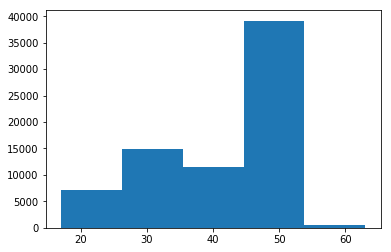

In [104]:
num_bins = 5
plt.hist(df_final['age'], num_bins)

In [30]:
#Decision Tree
predictors = ['age']
x_tree = df_final[predictors].values
y_tree = df_final['is_pass'].values
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_tree, y_tree)

In [12]:
df.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

[sudo] password for datascience: 


In [31]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)


In [17]:
predictors = ['program_id','trainee_id','program_type' ,'program_duration', 'test_id','test_type', 'trainee_id','program_type','difficulty_level', 'gender', 'education', 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
x = df_final1[predictors].values
y = df_final1['is_pass'].values
x_test = df1_final1[predictors].values

In [18]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_sample(x, y)


In [19]:
import random
random.seed(123)
xgtrain = xgb.DMatrix(x_resampled, y_resampled)
xgtest = xgb.DMatrix(x_test)
param = {'eta':0.20, 'objective':'binary:logistic'}
num_round = 2000
bst = xgb.train(param ,xgtrain, num_round)
preds = bst.predict(xgtest)

In [20]:
import random
random.seed(123)
xgtrain = xgb.DMatrix(x_resampled, y_resampled)
xgtest = xgb.DMatrix(x_test)
param = {'eta':0.15, 'objective':'binary:logistic'}
num_round = 2500
bst = xgb.train(param ,xgtrain, num_round)
preds5 = bst.predict(xgtest)

In [21]:
import lightgbm as lgb


In [22]:
predictors = ['program_id','trainee_id','program_type' ,'program_duration', 'test_id','test_type', 'trainee_id','program_type','difficulty_level', 'gender', 'education', 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
x = df_final1[predictors].values
y = df_final1['is_pass'].values
x_test = df1_final1[predictors].values


In [23]:
import random
random.seed(123)
d_train = lgb.Dataset(x_resampled, label=y_resampled)
d_test = lgb.Dataset(x_test)
params = {}
params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
params['num_leaves'] = 650
# params['min_data'] = 50
#params['max_depth'] = 20
bst1 = lgb.train(params, d_train, 5000)
preds1 = bst1.predict(x_test)

In [25]:
d_train = lgb.Dataset(x, label=y)
d_test = lgb.Dataset(x_test)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
params['num_leaves'] = 700
# params['min_data'] = 50
#params['max_depth'] = 20
bst1 = lgb.train(params, d_train, 6000)
preds2 = bst1.predict(x_test)

In [26]:
d_train = lgb.Dataset(x, label=y)
d_test = lgb.Dataset(x_test)
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
#params['sub_feature'] = 0.5
params['num_leaves'] = 700
# params['min_data'] = 50
#params['max_depth'] = 20
bst1 = lgb.train(params, d_train, 6500)
preds7 = bst1.predict(x_test)

In [28]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7


In [29]:
predictors = ['program_id','trainee_id','program_type' ,'program_duration', 'test_id','test_type', 'trainee_id','program_type','difficulty_level', 'gender', 'education', 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped','trainee_engagement_rating']
x = df_final1[predictors].values
y = df_final1['is_pass'].values
x_test = df1_final1[predictors].values

In [30]:
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 800
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, x, y, cv=kfold)

In [31]:
fit = model.fit(x,y)

In [33]:
preds3 = fit.predict(x_test)

In [131]:
df1_final1['is_pass'] = preds3
df1_final1.to_csv("Sub14.csv", columns=['id','is_pass'])

In [37]:
df1_final['is_pass'] = preds4

In [38]:
df1_final.to_csv("gbm4.csv", columns=['id','is_pass'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)


In [35]:
mod = rf.fit(x_resampled, y_resampled)

In [36]:
preds4 = mod.predict(x_test)

In [37]:
from catboost import CatBoostRegressor
import random
random.seed(1)
model=CatBoostRegressor(iterations=8000, depth=6, learning_rate=0.001, loss_function='RMSE')
cat_bst=model.fit(x, y)
preds6=cat_bst.predict(x_test)

0:	learn: 0.8333077	total: 68.7ms	remaining: 9m 9s
1:	learn: 0.8327049	total: 85.7ms	remaining: 5m 42s
2:	learn: 0.8321029	total: 101ms	remaining: 4m 29s
3:	learn: 0.8315016	total: 116ms	remaining: 3m 51s
4:	learn: 0.8309012	total: 132ms	remaining: 3m 30s
5:	learn: 0.8303015	total: 146ms	remaining: 3m 14s
6:	learn: 0.8297025	total: 161ms	remaining: 3m 4s
7:	learn: 0.8291044	total: 177ms	remaining: 2m 57s
8:	learn: 0.8285071	total: 192ms	remaining: 2m 50s
9:	learn: 0.8279104	total: 210ms	remaining: 2m 48s
10:	learn: 0.8273146	total: 226ms	remaining: 2m 44s
11:	learn: 0.8267196	total: 243ms	remaining: 2m 42s
12:	learn: 0.8261253	total: 262ms	remaining: 2m 40s
13:	learn: 0.8255317	total: 286ms	remaining: 2m 43s
14:	learn: 0.8249388	total: 306ms	remaining: 2m 43s
15:	learn: 0.8243467	total: 325ms	remaining: 2m 42s
16:	learn: 0.8237554	total: 342ms	remaining: 2m 40s
17:	learn: 0.8231657	total: 361ms	remaining: 2m 40s
18:	learn: 0.8225759	total: 378ms	remaining: 2m 38s
19:	learn: 0.8219868	t

167:	learn: 0.7427373	total: 3.01s	remaining: 2m 20s
168:	learn: 0.7422522	total: 3.03s	remaining: 2m 20s
169:	learn: 0.7417683	total: 3.04s	remaining: 2m 20s
170:	learn: 0.7412849	total: 3.06s	remaining: 2m 20s
171:	learn: 0.7408030	total: 3.08s	remaining: 2m 20s
172:	learn: 0.7403214	total: 3.09s	remaining: 2m 19s
173:	learn: 0.7398399	total: 3.11s	remaining: 2m 19s
174:	learn: 0.7393594	total: 3.13s	remaining: 2m 19s
175:	learn: 0.7388799	total: 3.14s	remaining: 2m 19s
176:	learn: 0.7384005	total: 3.16s	remaining: 2m 19s
177:	learn: 0.7379216	total: 3.17s	remaining: 2m 19s
178:	learn: 0.7374436	total: 3.19s	remaining: 2m 19s
179:	learn: 0.7369662	total: 3.21s	remaining: 2m 19s
180:	learn: 0.7364892	total: 3.24s	remaining: 2m 20s
181:	learn: 0.7360139	total: 3.26s	remaining: 2m 19s
182:	learn: 0.7355382	total: 3.27s	remaining: 2m 19s
183:	learn: 0.7350638	total: 3.29s	remaining: 2m 19s
184:	learn: 0.7345894	total: 3.31s	remaining: 2m 19s
185:	learn: 0.7341160	total: 3.33s	remaining: 

323:	learn: 0.6746227	total: 5.72s	remaining: 2m 15s
324:	learn: 0.6742315	total: 5.74s	remaining: 2m 15s
325:	learn: 0.6738408	total: 5.75s	remaining: 2m 15s
326:	learn: 0.6734512	total: 5.77s	remaining: 2m 15s
327:	learn: 0.6730626	total: 5.79s	remaining: 2m 15s
328:	learn: 0.6726738	total: 5.81s	remaining: 2m 15s
329:	learn: 0.6722868	total: 5.83s	remaining: 2m 15s
330:	learn: 0.6718988	total: 5.84s	remaining: 2m 15s
331:	learn: 0.6715113	total: 5.86s	remaining: 2m 15s
332:	learn: 0.6711259	total: 5.88s	remaining: 2m 15s
333:	learn: 0.6707399	total: 5.9s	remaining: 2m 15s
334:	learn: 0.6703552	total: 5.92s	remaining: 2m 15s
335:	learn: 0.6699705	total: 5.93s	remaining: 2m 15s
336:	learn: 0.6695855	total: 5.95s	remaining: 2m 15s
337:	learn: 0.6692010	total: 5.96s	remaining: 2m 15s
338:	learn: 0.6688172	total: 5.98s	remaining: 2m 15s
339:	learn: 0.6684351	total: 5.99s	remaining: 2m 15s
340:	learn: 0.6680540	total: 6.01s	remaining: 2m 14s
341:	learn: 0.6676726	total: 6.02s	remaining: 2

486:	learn: 0.6177837	total: 8.22s	remaining: 2m 6s
487:	learn: 0.6174749	total: 8.23s	remaining: 2m 6s
488:	learn: 0.6171676	total: 8.25s	remaining: 2m 6s
489:	learn: 0.6168604	total: 8.27s	remaining: 2m 6s
490:	learn: 0.6165523	total: 8.28s	remaining: 2m 6s
491:	learn: 0.6162447	total: 8.29s	remaining: 2m 6s
492:	learn: 0.6159377	total: 8.31s	remaining: 2m 6s
493:	learn: 0.6156327	total: 8.32s	remaining: 2m 6s
494:	learn: 0.6153287	total: 8.34s	remaining: 2m 6s
495:	learn: 0.6150247	total: 8.36s	remaining: 2m 6s
496:	learn: 0.6147196	total: 8.37s	remaining: 2m 6s
497:	learn: 0.6144145	total: 8.38s	remaining: 2m 6s
498:	learn: 0.6141100	total: 8.4s	remaining: 2m 6s
499:	learn: 0.6138069	total: 8.41s	remaining: 2m 6s
500:	learn: 0.6135036	total: 8.43s	remaining: 2m 6s
501:	learn: 0.6132003	total: 8.45s	remaining: 2m 6s
502:	learn: 0.6128983	total: 8.46s	remaining: 2m 6s
503:	learn: 0.6125959	total: 8.48s	remaining: 2m 6s
504:	learn: 0.6122943	total: 8.5s	remaining: 2m 6s
505:	learn: 0.

648:	learn: 0.5733943	total: 10.7s	remaining: 2m 1s
649:	learn: 0.5731541	total: 10.7s	remaining: 2m 1s
650:	learn: 0.5729138	total: 10.7s	remaining: 2m 1s
651:	learn: 0.5726738	total: 10.7s	remaining: 2m 1s
652:	learn: 0.5724344	total: 10.8s	remaining: 2m 1s
653:	learn: 0.5721950	total: 10.8s	remaining: 2m 1s
654:	learn: 0.5719552	total: 10.8s	remaining: 2m
655:	learn: 0.5717157	total: 10.8s	remaining: 2m
656:	learn: 0.5714761	total: 10.8s	remaining: 2m
657:	learn: 0.5712377	total: 10.8s	remaining: 2m
658:	learn: 0.5709993	total: 10.8s	remaining: 2m
659:	learn: 0.5707625	total: 10.9s	remaining: 2m
660:	learn: 0.5705249	total: 10.9s	remaining: 2m
661:	learn: 0.5702889	total: 10.9s	remaining: 2m
662:	learn: 0.5700520	total: 10.9s	remaining: 2m
663:	learn: 0.5698157	total: 10.9s	remaining: 2m
664:	learn: 0.5695795	total: 10.9s	remaining: 2m
665:	learn: 0.5693436	total: 11s	remaining: 2m
666:	learn: 0.5691087	total: 11s	remaining: 2m
667:	learn: 0.5688745	total: 11s	remaining: 2m
668:	lea

814:	learn: 0.5381713	total: 13.2s	remaining: 1m 56s
815:	learn: 0.5379869	total: 13.2s	remaining: 1m 56s
816:	learn: 0.5378022	total: 13.2s	remaining: 1m 56s
817:	learn: 0.5376173	total: 13.3s	remaining: 1m 56s
818:	learn: 0.5374322	total: 13.3s	remaining: 1m 56s
819:	learn: 0.5372486	total: 13.3s	remaining: 1m 56s
820:	learn: 0.5370653	total: 13.3s	remaining: 1m 56s
821:	learn: 0.5368818	total: 13.3s	remaining: 1m 56s
822:	learn: 0.5366988	total: 13.3s	remaining: 1m 56s
823:	learn: 0.5365171	total: 13.3s	remaining: 1m 56s
824:	learn: 0.5363349	total: 13.4s	remaining: 1m 56s
825:	learn: 0.5361527	total: 13.4s	remaining: 1m 56s
826:	learn: 0.5359701	total: 13.4s	remaining: 1m 56s
827:	learn: 0.5357894	total: 13.4s	remaining: 1m 56s
828:	learn: 0.5356072	total: 13.4s	remaining: 1m 56s
829:	learn: 0.5354268	total: 13.4s	remaining: 1m 56s
830:	learn: 0.5352453	total: 13.5s	remaining: 1m 56s
831:	learn: 0.5350652	total: 13.5s	remaining: 1m 56s
832:	learn: 0.5348860	total: 13.5s	remaining: 

977:	learn: 0.5116883	total: 15.7s	remaining: 1m 52s
978:	learn: 0.5115466	total: 15.7s	remaining: 1m 52s
979:	learn: 0.5114059	total: 15.8s	remaining: 1m 52s
980:	learn: 0.5112654	total: 15.8s	remaining: 1m 52s
981:	learn: 0.5111240	total: 15.8s	remaining: 1m 52s
982:	learn: 0.5109839	total: 15.8s	remaining: 1m 52s
983:	learn: 0.5108434	total: 15.8s	remaining: 1m 52s
984:	learn: 0.5107028	total: 15.8s	remaining: 1m 52s
985:	learn: 0.5105617	total: 15.9s	remaining: 1m 52s
986:	learn: 0.5104213	total: 15.9s	remaining: 1m 52s
987:	learn: 0.5102823	total: 15.9s	remaining: 1m 52s
988:	learn: 0.5101440	total: 15.9s	remaining: 1m 52s
989:	learn: 0.5100052	total: 15.9s	remaining: 1m 52s
990:	learn: 0.5098661	total: 15.9s	remaining: 1m 52s
991:	learn: 0.5097282	total: 15.9s	remaining: 1m 52s
992:	learn: 0.5095906	total: 16s	remaining: 1m 52s
993:	learn: 0.5094517	total: 16s	remaining: 1m 52s
994:	learn: 0.5093146	total: 16s	remaining: 1m 52s
995:	learn: 0.5091771	total: 16s	remaining: 1m 52s
9

1142:	learn: 0.4912960	total: 18.3s	remaining: 1m 49s
1143:	learn: 0.4911893	total: 18.3s	remaining: 1m 49s
1144:	learn: 0.4910831	total: 18.3s	remaining: 1m 49s
1145:	learn: 0.4909761	total: 18.3s	remaining: 1m 49s
1146:	learn: 0.4908686	total: 18.3s	remaining: 1m 49s
1147:	learn: 0.4907624	total: 18.3s	remaining: 1m 49s
1148:	learn: 0.4906565	total: 18.3s	remaining: 1m 49s
1149:	learn: 0.4905514	total: 18.4s	remaining: 1m 49s
1150:	learn: 0.4904453	total: 18.4s	remaining: 1m 49s
1151:	learn: 0.4903399	total: 18.4s	remaining: 1m 49s
1152:	learn: 0.4902351	total: 18.4s	remaining: 1m 49s
1153:	learn: 0.4901289	total: 18.4s	remaining: 1m 49s
1154:	learn: 0.4900242	total: 18.4s	remaining: 1m 49s
1155:	learn: 0.4899203	total: 18.5s	remaining: 1m 49s
1156:	learn: 0.4898162	total: 18.5s	remaining: 1m 49s
1157:	learn: 0.4897124	total: 18.5s	remaining: 1m 49s
1158:	learn: 0.4896078	total: 18.5s	remaining: 1m 49s
1159:	learn: 0.4895028	total: 18.5s	remaining: 1m 49s
1160:	learn: 0.4893991	total

1299:	learn: 0.4765678	total: 20.8s	remaining: 1m 46s
1300:	learn: 0.4764870	total: 20.8s	remaining: 1m 46s
1301:	learn: 0.4764054	total: 20.8s	remaining: 1m 46s
1302:	learn: 0.4763235	total: 20.8s	remaining: 1m 46s
1303:	learn: 0.4762430	total: 20.8s	remaining: 1m 46s
1304:	learn: 0.4761613	total: 20.8s	remaining: 1m 46s
1305:	learn: 0.4760796	total: 20.8s	remaining: 1m 46s
1306:	learn: 0.4759991	total: 20.9s	remaining: 1m 46s
1307:	learn: 0.4759189	total: 20.9s	remaining: 1m 46s
1308:	learn: 0.4758392	total: 20.9s	remaining: 1m 46s
1309:	learn: 0.4757598	total: 20.9s	remaining: 1m 46s
1310:	learn: 0.4756806	total: 20.9s	remaining: 1m 46s
1311:	learn: 0.4756017	total: 20.9s	remaining: 1m 46s
1312:	learn: 0.4755216	total: 20.9s	remaining: 1m 46s
1313:	learn: 0.4754424	total: 21s	remaining: 1m 46s
1314:	learn: 0.4753634	total: 21s	remaining: 1m 46s
1315:	learn: 0.4752843	total: 21s	remaining: 1m 46s
1316:	learn: 0.4752052	total: 21s	remaining: 1m 46s
1317:	learn: 0.4751267	total: 21s	re

1457:	learn: 0.4653144	total: 23.3s	remaining: 1m 44s
1458:	learn: 0.4652533	total: 23.3s	remaining: 1m 44s
1459:	learn: 0.4651902	total: 23.3s	remaining: 1m 44s
1460:	learn: 0.4651282	total: 23.3s	remaining: 1m 44s
1461:	learn: 0.4650672	total: 23.3s	remaining: 1m 44s
1462:	learn: 0.4650057	total: 23.3s	remaining: 1m 44s
1463:	learn: 0.4649442	total: 23.3s	remaining: 1m 44s
1464:	learn: 0.4648837	total: 23.4s	remaining: 1m 44s
1465:	learn: 0.4648233	total: 23.4s	remaining: 1m 44s
1466:	learn: 0.4647630	total: 23.4s	remaining: 1m 44s
1467:	learn: 0.4647025	total: 23.4s	remaining: 1m 44s
1468:	learn: 0.4646413	total: 23.4s	remaining: 1m 44s
1469:	learn: 0.4645817	total: 23.4s	remaining: 1m 44s
1470:	learn: 0.4645212	total: 23.5s	remaining: 1m 44s
1471:	learn: 0.4644601	total: 23.5s	remaining: 1m 44s
1472:	learn: 0.4644004	total: 23.5s	remaining: 1m 44s
1473:	learn: 0.4643390	total: 23.5s	remaining: 1m 44s
1474:	learn: 0.4642796	total: 23.5s	remaining: 1m 44s
1475:	learn: 0.4642201	total

1620:	learn: 0.4565820	total: 25.8s	remaining: 1m 41s
1621:	learn: 0.4565363	total: 25.8s	remaining: 1m 41s
1622:	learn: 0.4564898	total: 25.8s	remaining: 1m 41s
1623:	learn: 0.4564444	total: 25.8s	remaining: 1m 41s
1624:	learn: 0.4563983	total: 25.8s	remaining: 1m 41s
1625:	learn: 0.4563528	total: 25.9s	remaining: 1m 41s
1626:	learn: 0.4563076	total: 25.9s	remaining: 1m 41s
1627:	learn: 0.4562614	total: 25.9s	remaining: 1m 41s
1628:	learn: 0.4562150	total: 25.9s	remaining: 1m 41s
1629:	learn: 0.4561703	total: 25.9s	remaining: 1m 41s
1630:	learn: 0.4561244	total: 25.9s	remaining: 1m 41s
1631:	learn: 0.4560790	total: 25.9s	remaining: 1m 41s
1632:	learn: 0.4560333	total: 26s	remaining: 1m 41s
1633:	learn: 0.4559877	total: 26s	remaining: 1m 41s
1634:	learn: 0.4559424	total: 26s	remaining: 1m 41s
1635:	learn: 0.4558980	total: 26s	remaining: 1m 41s
1636:	learn: 0.4558529	total: 26s	remaining: 1m 41s
1637:	learn: 0.4558081	total: 26s	remaining: 1m 41s
1638:	learn: 0.4557636	total: 26.1s	rema

1777:	learn: 0.4502576	total: 28.2s	remaining: 1m 38s
1778:	learn: 0.4502220	total: 28.3s	remaining: 1m 38s
1779:	learn: 0.4501876	total: 28.3s	remaining: 1m 38s
1780:	learn: 0.4501525	total: 28.3s	remaining: 1m 38s
1781:	learn: 0.4501177	total: 28.3s	remaining: 1m 38s
1782:	learn: 0.4500832	total: 28.3s	remaining: 1m 38s
1783:	learn: 0.4500492	total: 28.3s	remaining: 1m 38s
1784:	learn: 0.4500151	total: 28.3s	remaining: 1m 38s
1785:	learn: 0.4499811	total: 28.4s	remaining: 1m 38s
1786:	learn: 0.4499460	total: 28.4s	remaining: 1m 38s
1787:	learn: 0.4499117	total: 28.4s	remaining: 1m 38s
1788:	learn: 0.4498777	total: 28.4s	remaining: 1m 38s
1789:	learn: 0.4498433	total: 28.4s	remaining: 1m 38s
1790:	learn: 0.4498097	total: 28.5s	remaining: 1m 38s
1791:	learn: 0.4497750	total: 28.5s	remaining: 1m 38s
1792:	learn: 0.4497405	total: 28.5s	remaining: 1m 38s
1793:	learn: 0.4497071	total: 28.5s	remaining: 1m 38s
1794:	learn: 0.4496733	total: 28.5s	remaining: 1m 38s
1795:	learn: 0.4496384	total

1935:	learn: 0.4454299	total: 30.7s	remaining: 1m 36s
1936:	learn: 0.4454034	total: 30.7s	remaining: 1m 36s
1937:	learn: 0.4453772	total: 30.8s	remaining: 1m 36s
1938:	learn: 0.4453503	total: 30.8s	remaining: 1m 36s
1939:	learn: 0.4453248	total: 30.8s	remaining: 1m 36s
1940:	learn: 0.4452993	total: 30.8s	remaining: 1m 36s
1941:	learn: 0.4452737	total: 30.8s	remaining: 1m 36s
1942:	learn: 0.4452474	total: 30.8s	remaining: 1m 36s
1943:	learn: 0.4452216	total: 30.8s	remaining: 1m 36s
1944:	learn: 0.4451962	total: 30.9s	remaining: 1m 36s
1945:	learn: 0.4451690	total: 30.9s	remaining: 1m 36s
1946:	learn: 0.4451414	total: 30.9s	remaining: 1m 36s
1947:	learn: 0.4451161	total: 30.9s	remaining: 1m 36s
1948:	learn: 0.4450893	total: 30.9s	remaining: 1m 35s
1949:	learn: 0.4450641	total: 30.9s	remaining: 1m 35s
1950:	learn: 0.4450389	total: 30.9s	remaining: 1m 35s
1951:	learn: 0.4450139	total: 31s	remaining: 1m 35s
1952:	learn: 0.4449878	total: 31s	remaining: 1m 35s
1953:	learn: 0.4449611	total: 31

2091:	learn: 0.4418249	total: 33.2s	remaining: 1m 33s
2092:	learn: 0.4418054	total: 33.3s	remaining: 1m 33s
2093:	learn: 0.4417854	total: 33.3s	remaining: 1m 33s
2094:	learn: 0.4417656	total: 33.3s	remaining: 1m 33s
2095:	learn: 0.4417459	total: 33.3s	remaining: 1m 33s
2096:	learn: 0.4417250	total: 33.3s	remaining: 1m 33s
2097:	learn: 0.4417056	total: 33.4s	remaining: 1m 33s
2098:	learn: 0.4416857	total: 33.4s	remaining: 1m 33s
2099:	learn: 0.4416653	total: 33.4s	remaining: 1m 33s
2100:	learn: 0.4416448	total: 33.4s	remaining: 1m 33s
2101:	learn: 0.4416247	total: 33.5s	remaining: 1m 33s
2102:	learn: 0.4416049	total: 33.5s	remaining: 1m 33s
2103:	learn: 0.4415845	total: 33.5s	remaining: 1m 33s
2104:	learn: 0.4415655	total: 33.5s	remaining: 1m 33s
2105:	learn: 0.4415462	total: 33.5s	remaining: 1m 33s
2106:	learn: 0.4415268	total: 33.6s	remaining: 1m 33s
2107:	learn: 0.4415076	total: 33.6s	remaining: 1m 33s
2108:	learn: 0.4414883	total: 33.6s	remaining: 1m 33s
2109:	learn: 0.4414682	total

2251:	learn: 0.4390091	total: 36.3s	remaining: 1m 32s
2252:	learn: 0.4389937	total: 36.3s	remaining: 1m 32s
2253:	learn: 0.4389790	total: 36.4s	remaining: 1m 32s
2254:	learn: 0.4389628	total: 36.4s	remaining: 1m 32s
2255:	learn: 0.4389481	total: 36.4s	remaining: 1m 32s
2256:	learn: 0.4389333	total: 36.4s	remaining: 1m 32s
2257:	learn: 0.4389176	total: 36.4s	remaining: 1m 32s
2258:	learn: 0.4389030	total: 36.5s	remaining: 1m 32s
2259:	learn: 0.4388876	total: 36.5s	remaining: 1m 32s
2260:	learn: 0.4388721	total: 36.5s	remaining: 1m 32s
2261:	learn: 0.4388576	total: 36.5s	remaining: 1m 32s
2262:	learn: 0.4388420	total: 36.5s	remaining: 1m 32s
2263:	learn: 0.4388274	total: 36.6s	remaining: 1m 32s
2264:	learn: 0.4388125	total: 36.6s	remaining: 1m 32s
2265:	learn: 0.4387972	total: 36.6s	remaining: 1m 32s
2266:	learn: 0.4387820	total: 36.6s	remaining: 1m 32s
2267:	learn: 0.4387675	total: 36.6s	remaining: 1m 32s
2268:	learn: 0.4387511	total: 36.7s	remaining: 1m 32s
2269:	learn: 0.4387361	total

2412:	learn: 0.4368521	total: 39.2s	remaining: 1m 30s
2413:	learn: 0.4368401	total: 39.3s	remaining: 1m 30s
2414:	learn: 0.4368275	total: 39.3s	remaining: 1m 30s
2415:	learn: 0.4368155	total: 39.3s	remaining: 1m 30s
2416:	learn: 0.4368034	total: 39.3s	remaining: 1m 30s
2417:	learn: 0.4367909	total: 39.3s	remaining: 1m 30s
2418:	learn: 0.4367796	total: 39.3s	remaining: 1m 30s
2419:	learn: 0.4367681	total: 39.4s	remaining: 1m 30s
2420:	learn: 0.4367561	total: 39.4s	remaining: 1m 30s
2421:	learn: 0.4367440	total: 39.4s	remaining: 1m 30s
2422:	learn: 0.4367314	total: 39.4s	remaining: 1m 30s
2423:	learn: 0.4367207	total: 39.4s	remaining: 1m 30s
2424:	learn: 0.4367100	total: 39.5s	remaining: 1m 30s
2425:	learn: 0.4366989	total: 39.5s	remaining: 1m 30s
2426:	learn: 0.4366878	total: 39.5s	remaining: 1m 30s
2427:	learn: 0.4366759	total: 39.5s	remaining: 1m 30s
2428:	learn: 0.4366644	total: 39.5s	remaining: 1m 30s
2429:	learn: 0.4366529	total: 39.5s	remaining: 1m 30s
2430:	learn: 0.4366414	total

2571:	learn: 0.4352021	total: 42s	remaining: 1m 28s
2572:	learn: 0.4351931	total: 42s	remaining: 1m 28s
2573:	learn: 0.4351845	total: 42s	remaining: 1m 28s
2574:	learn: 0.4351750	total: 42s	remaining: 1m 28s
2575:	learn: 0.4351660	total: 42.1s	remaining: 1m 28s
2576:	learn: 0.4351570	total: 42.1s	remaining: 1m 28s
2577:	learn: 0.4351484	total: 42.1s	remaining: 1m 28s
2578:	learn: 0.4351393	total: 42.1s	remaining: 1m 28s
2579:	learn: 0.4351308	total: 42.1s	remaining: 1m 28s
2580:	learn: 0.4351221	total: 42.1s	remaining: 1m 28s
2581:	learn: 0.4351126	total: 42.2s	remaining: 1m 28s
2582:	learn: 0.4351034	total: 42.2s	remaining: 1m 28s
2583:	learn: 0.4350949	total: 42.2s	remaining: 1m 28s
2584:	learn: 0.4350854	total: 42.2s	remaining: 1m 28s
2585:	learn: 0.4350772	total: 42.2s	remaining: 1m 28s
2586:	learn: 0.4350690	total: 42.2s	remaining: 1m 28s
2587:	learn: 0.4350607	total: 42.3s	remaining: 1m 28s
2588:	learn: 0.4350519	total: 42.3s	remaining: 1m 28s
2589:	learn: 0.4350438	total: 42.3s	

2728:	learn: 0.4339368	total: 44.7s	remaining: 1m 26s
2729:	learn: 0.4339301	total: 44.8s	remaining: 1m 26s
2730:	learn: 0.4339233	total: 44.8s	remaining: 1m 26s
2731:	learn: 0.4339164	total: 44.8s	remaining: 1m 26s
2732:	learn: 0.4339095	total: 44.8s	remaining: 1m 26s
2733:	learn: 0.4339016	total: 44.8s	remaining: 1m 26s
2734:	learn: 0.4338946	total: 44.8s	remaining: 1m 26s
2735:	learn: 0.4338875	total: 44.9s	remaining: 1m 26s
2736:	learn: 0.4338810	total: 44.9s	remaining: 1m 26s
2737:	learn: 0.4338743	total: 44.9s	remaining: 1m 26s
2738:	learn: 0.4338679	total: 44.9s	remaining: 1m 26s
2739:	learn: 0.4338596	total: 44.9s	remaining: 1m 26s
2740:	learn: 0.4338518	total: 44.9s	remaining: 1m 26s
2741:	learn: 0.4338434	total: 45s	remaining: 1m 26s
2742:	learn: 0.4338359	total: 45s	remaining: 1m 26s
2743:	learn: 0.4338289	total: 45s	remaining: 1m 26s
2744:	learn: 0.4338221	total: 45s	remaining: 1m 26s
2745:	learn: 0.4338155	total: 45s	remaining: 1m 26s
2746:	learn: 0.4338084	total: 45s	rema

2893:	learn: 0.4328735	total: 47.4s	remaining: 1m 23s
2894:	learn: 0.4328678	total: 47.5s	remaining: 1m 23s
2895:	learn: 0.4328627	total: 47.5s	remaining: 1m 23s
2896:	learn: 0.4328576	total: 47.5s	remaining: 1m 23s
2897:	learn: 0.4328516	total: 47.5s	remaining: 1m 23s
2898:	learn: 0.4328456	total: 47.5s	remaining: 1m 23s
2899:	learn: 0.4328403	total: 47.5s	remaining: 1m 23s
2900:	learn: 0.4328350	total: 47.6s	remaining: 1m 23s
2901:	learn: 0.4328297	total: 47.6s	remaining: 1m 23s
2902:	learn: 0.4328243	total: 47.6s	remaining: 1m 23s
2903:	learn: 0.4328189	total: 47.6s	remaining: 1m 23s
2904:	learn: 0.4328137	total: 47.6s	remaining: 1m 23s
2905:	learn: 0.4328077	total: 47.6s	remaining: 1m 23s
2906:	learn: 0.4328025	total: 47.6s	remaining: 1m 23s
2907:	learn: 0.4327969	total: 47.7s	remaining: 1m 23s
2908:	learn: 0.4327910	total: 47.7s	remaining: 1m 23s
2909:	learn: 0.4327857	total: 47.7s	remaining: 1m 23s
2910:	learn: 0.4327797	total: 47.7s	remaining: 1m 23s
2911:	learn: 0.4327747	total

3053:	learn: 0.4320590	total: 50.1s	remaining: 1m 21s
3054:	learn: 0.4320551	total: 50.1s	remaining: 1m 21s
3055:	learn: 0.4320506	total: 50.1s	remaining: 1m 21s
3056:	learn: 0.4320460	total: 50.2s	remaining: 1m 21s
3057:	learn: 0.4320412	total: 50.2s	remaining: 1m 21s
3058:	learn: 0.4320359	total: 50.2s	remaining: 1m 21s
3059:	learn: 0.4320314	total: 50.2s	remaining: 1m 21s
3060:	learn: 0.4320266	total: 50.2s	remaining: 1m 21s
3061:	learn: 0.4320222	total: 50.2s	remaining: 1m 21s
3062:	learn: 0.4320170	total: 50.2s	remaining: 1m 20s
3063:	learn: 0.4320126	total: 50.3s	remaining: 1m 20s
3064:	learn: 0.4320079	total: 50.3s	remaining: 1m 20s
3065:	learn: 0.4320029	total: 50.3s	remaining: 1m 20s
3066:	learn: 0.4319984	total: 50.3s	remaining: 1m 20s
3067:	learn: 0.4319931	total: 50.3s	remaining: 1m 20s
3068:	learn: 0.4319891	total: 50.3s	remaining: 1m 20s
3069:	learn: 0.4319853	total: 50.4s	remaining: 1m 20s
3070:	learn: 0.4319810	total: 50.4s	remaining: 1m 20s
3071:	learn: 0.4319768	total

3216:	learn: 0.4313847	total: 53s	remaining: 1m 18s
3217:	learn: 0.4313808	total: 53s	remaining: 1m 18s
3218:	learn: 0.4313776	total: 53s	remaining: 1m 18s
3219:	learn: 0.4313736	total: 53s	remaining: 1m 18s
3220:	learn: 0.4313684	total: 53.1s	remaining: 1m 18s
3221:	learn: 0.4313645	total: 53.1s	remaining: 1m 18s
3222:	learn: 0.4313611	total: 53.1s	remaining: 1m 18s
3223:	learn: 0.4313573	total: 53.1s	remaining: 1m 18s
3224:	learn: 0.4313538	total: 53.1s	remaining: 1m 18s
3225:	learn: 0.4313504	total: 53.1s	remaining: 1m 18s
3226:	learn: 0.4313465	total: 53.2s	remaining: 1m 18s
3227:	learn: 0.4313431	total: 53.2s	remaining: 1m 18s
3228:	learn: 0.4313401	total: 53.2s	remaining: 1m 18s
3229:	learn: 0.4313366	total: 53.2s	remaining: 1m 18s
3230:	learn: 0.4313330	total: 53.2s	remaining: 1m 18s
3231:	learn: 0.4313286	total: 53.3s	remaining: 1m 18s
3232:	learn: 0.4313251	total: 53.3s	remaining: 1m 18s
3233:	learn: 0.4313218	total: 53.3s	remaining: 1m 18s
3234:	learn: 0.4313183	total: 53.3s	

3371:	learn: 0.4308485	total: 55.8s	remaining: 1m 16s
3372:	learn: 0.4308454	total: 55.8s	remaining: 1m 16s
3373:	learn: 0.4308424	total: 55.8s	remaining: 1m 16s
3374:	learn: 0.4308397	total: 55.8s	remaining: 1m 16s
3375:	learn: 0.4308363	total: 55.9s	remaining: 1m 16s
3376:	learn: 0.4308333	total: 55.9s	remaining: 1m 16s
3377:	learn: 0.4308300	total: 55.9s	remaining: 1m 16s
3378:	learn: 0.4308259	total: 55.9s	remaining: 1m 16s
3379:	learn: 0.4308231	total: 55.9s	remaining: 1m 16s
3380:	learn: 0.4308206	total: 55.9s	remaining: 1m 16s
3381:	learn: 0.4308177	total: 56s	remaining: 1m 16s
3382:	learn: 0.4308152	total: 56s	remaining: 1m 16s
3383:	learn: 0.4308124	total: 56s	remaining: 1m 16s
3384:	learn: 0.4308093	total: 56s	remaining: 1m 16s
3385:	learn: 0.4308053	total: 56.1s	remaining: 1m 16s
3386:	learn: 0.4308024	total: 56.1s	remaining: 1m 16s
3387:	learn: 0.4307997	total: 56.1s	remaining: 1m 16s
3388:	learn: 0.4307969	total: 56.1s	remaining: 1m 16s
3389:	learn: 0.4307940	total: 56.1s	

3531:	learn: 0.4303868	total: 58.7s	remaining: 1m 14s
3532:	learn: 0.4303844	total: 58.7s	remaining: 1m 14s
3533:	learn: 0.4303819	total: 58.7s	remaining: 1m 14s
3534:	learn: 0.4303793	total: 58.8s	remaining: 1m 14s
3535:	learn: 0.4303767	total: 58.8s	remaining: 1m 14s
3536:	learn: 0.4303742	total: 58.8s	remaining: 1m 14s
3537:	learn: 0.4303712	total: 58.8s	remaining: 1m 14s
3538:	learn: 0.4303678	total: 58.9s	remaining: 1m 14s
3539:	learn: 0.4303651	total: 58.9s	remaining: 1m 14s
3540:	learn: 0.4303621	total: 58.9s	remaining: 1m 14s
3541:	learn: 0.4303591	total: 58.9s	remaining: 1m 14s
3542:	learn: 0.4303559	total: 58.9s	remaining: 1m 14s
3543:	learn: 0.4303522	total: 59s	remaining: 1m 14s
3544:	learn: 0.4303495	total: 59s	remaining: 1m 14s
3545:	learn: 0.4303472	total: 59s	remaining: 1m 14s
3546:	learn: 0.4303441	total: 59s	remaining: 1m 14s
3547:	learn: 0.4303409	total: 59s	remaining: 1m 14s
3548:	learn: 0.4303387	total: 59s	remaining: 1m 14s
3549:	learn: 0.4303358	total: 59.1s	rema

3690:	learn: 0.4299954	total: 1m 1s	remaining: 1m 11s
3691:	learn: 0.4299928	total: 1m 1s	remaining: 1m 11s
3692:	learn: 0.4299909	total: 1m 1s	remaining: 1m 11s
3693:	learn: 0.4299890	total: 1m 1s	remaining: 1m 11s
3694:	learn: 0.4299866	total: 1m 1s	remaining: 1m 11s
3695:	learn: 0.4299842	total: 1m 1s	remaining: 1m 11s
3696:	learn: 0.4299822	total: 1m 1s	remaining: 1m 11s
3697:	learn: 0.4299802	total: 1m 1s	remaining: 1m 11s
3698:	learn: 0.4299784	total: 1m 1s	remaining: 1m 11s
3699:	learn: 0.4299761	total: 1m 1s	remaining: 1m 11s
3700:	learn: 0.4299744	total: 1m 1s	remaining: 1m 11s
3701:	learn: 0.4299722	total: 1m 1s	remaining: 1m 11s
3702:	learn: 0.4299701	total: 1m 1s	remaining: 1m 11s
3703:	learn: 0.4299673	total: 1m 1s	remaining: 1m 11s
3704:	learn: 0.4299649	total: 1m 1s	remaining: 1m 11s
3705:	learn: 0.4299629	total: 1m 1s	remaining: 1m 11s
3706:	learn: 0.4299607	total: 1m 1s	remaining: 1m 11s
3707:	learn: 0.4299587	total: 1m 1s	remaining: 1m 11s
3708:	learn: 0.4299559	total

3850:	learn: 0.4296464	total: 1m 4s	remaining: 1m 9s
3851:	learn: 0.4296442	total: 1m 4s	remaining: 1m 9s
3852:	learn: 0.4296421	total: 1m 4s	remaining: 1m 9s
3853:	learn: 0.4296401	total: 1m 4s	remaining: 1m 9s
3854:	learn: 0.4296377	total: 1m 4s	remaining: 1m 9s
3855:	learn: 0.4296356	total: 1m 4s	remaining: 1m 9s
3856:	learn: 0.4296336	total: 1m 4s	remaining: 1m 9s
3857:	learn: 0.4296314	total: 1m 4s	remaining: 1m 9s
3858:	learn: 0.4296294	total: 1m 4s	remaining: 1m 9s
3859:	learn: 0.4296271	total: 1m 4s	remaining: 1m 9s
3860:	learn: 0.4296254	total: 1m 4s	remaining: 1m 9s
3861:	learn: 0.4296240	total: 1m 4s	remaining: 1m 9s
3862:	learn: 0.4296223	total: 1m 5s	remaining: 1m 9s
3863:	learn: 0.4296205	total: 1m 5s	remaining: 1m 9s
3864:	learn: 0.4296189	total: 1m 5s	remaining: 1m 9s
3865:	learn: 0.4296165	total: 1m 5s	remaining: 1m 9s
3866:	learn: 0.4296145	total: 1m 5s	remaining: 1m 9s
3867:	learn: 0.4296115	total: 1m 5s	remaining: 1m 9s
3868:	learn: 0.4296091	total: 1m 5s	remaining:

4009:	learn: 0.4293386	total: 1m 8s	remaining: 1m 7s
4010:	learn: 0.4293365	total: 1m 8s	remaining: 1m 7s
4011:	learn: 0.4293341	total: 1m 8s	remaining: 1m 7s
4012:	learn: 0.4293312	total: 1m 8s	remaining: 1m 7s
4013:	learn: 0.4293284	total: 1m 8s	remaining: 1m 7s
4014:	learn: 0.4293266	total: 1m 8s	remaining: 1m 7s
4015:	learn: 0.4293251	total: 1m 8s	remaining: 1m 7s
4016:	learn: 0.4293229	total: 1m 8s	remaining: 1m 7s
4017:	learn: 0.4293214	total: 1m 8s	remaining: 1m 7s
4018:	learn: 0.4293187	total: 1m 8s	remaining: 1m 7s
4019:	learn: 0.4293169	total: 1m 8s	remaining: 1m 7s
4020:	learn: 0.4293154	total: 1m 8s	remaining: 1m 7s
4021:	learn: 0.4293141	total: 1m 8s	remaining: 1m 7s
4022:	learn: 0.4293121	total: 1m 8s	remaining: 1m 7s
4023:	learn: 0.4293110	total: 1m 8s	remaining: 1m 7s
4024:	learn: 0.4293087	total: 1m 8s	remaining: 1m 7s
4025:	learn: 0.4293069	total: 1m 8s	remaining: 1m 7s
4026:	learn: 0.4293050	total: 1m 8s	remaining: 1m 7s
4027:	learn: 0.4293034	total: 1m 8s	remaining:

4174:	learn: 0.4290424	total: 1m 11s	remaining: 1m 5s
4175:	learn: 0.4290413	total: 1m 11s	remaining: 1m 5s
4176:	learn: 0.4290397	total: 1m 11s	remaining: 1m 5s
4177:	learn: 0.4290386	total: 1m 11s	remaining: 1m 5s
4178:	learn: 0.4290368	total: 1m 11s	remaining: 1m 5s
4179:	learn: 0.4290347	total: 1m 11s	remaining: 1m 5s
4180:	learn: 0.4290335	total: 1m 11s	remaining: 1m 5s
4181:	learn: 0.4290322	total: 1m 11s	remaining: 1m 5s
4182:	learn: 0.4290310	total: 1m 11s	remaining: 1m 5s
4183:	learn: 0.4290291	total: 1m 11s	remaining: 1m 5s
4184:	learn: 0.4290271	total: 1m 11s	remaining: 1m 5s
4185:	learn: 0.4290251	total: 1m 11s	remaining: 1m 5s
4186:	learn: 0.4290241	total: 1m 11s	remaining: 1m 5s
4187:	learn: 0.4290225	total: 1m 11s	remaining: 1m 5s
4188:	learn: 0.4290208	total: 1m 11s	remaining: 1m 5s
4189:	learn: 0.4290184	total: 1m 11s	remaining: 1m 5s
4190:	learn: 0.4290165	total: 1m 11s	remaining: 1m 5s
4191:	learn: 0.4290148	total: 1m 11s	remaining: 1m 5s
4192:	learn: 0.4290129	total

4329:	learn: 0.4287921	total: 1m 14s	remaining: 1m 2s
4330:	learn: 0.4287908	total: 1m 14s	remaining: 1m 2s
4331:	learn: 0.4287894	total: 1m 14s	remaining: 1m 2s
4332:	learn: 0.4287882	total: 1m 14s	remaining: 1m 2s
4333:	learn: 0.4287865	total: 1m 14s	remaining: 1m 2s
4334:	learn: 0.4287845	total: 1m 14s	remaining: 1m 2s
4335:	learn: 0.4287820	total: 1m 14s	remaining: 1m 2s
4336:	learn: 0.4287806	total: 1m 14s	remaining: 1m 2s
4337:	learn: 0.4287793	total: 1m 14s	remaining: 1m 2s
4338:	learn: 0.4287769	total: 1m 14s	remaining: 1m 2s
4339:	learn: 0.4287759	total: 1m 14s	remaining: 1m 2s
4340:	learn: 0.4287740	total: 1m 14s	remaining: 1m 2s
4341:	learn: 0.4287725	total: 1m 14s	remaining: 1m 2s
4342:	learn: 0.4287708	total: 1m 14s	remaining: 1m 2s
4343:	learn: 0.4287687	total: 1m 14s	remaining: 1m 2s
4344:	learn: 0.4287676	total: 1m 14s	remaining: 1m 2s
4345:	learn: 0.4287664	total: 1m 14s	remaining: 1m 2s
4346:	learn: 0.4287650	total: 1m 14s	remaining: 1m 2s
4347:	learn: 0.4287635	total

4490:	learn: 0.4285470	total: 1m 17s	remaining: 1m
4491:	learn: 0.4285453	total: 1m 17s	remaining: 1m
4492:	learn: 0.4285438	total: 1m 17s	remaining: 1m
4493:	learn: 0.4285421	total: 1m 17s	remaining: 1m
4494:	learn: 0.4285409	total: 1m 17s	remaining: 1m
4495:	learn: 0.4285399	total: 1m 17s	remaining: 1m
4496:	learn: 0.4285386	total: 1m 17s	remaining: 1m
4497:	learn: 0.4285367	total: 1m 17s	remaining: 1m
4498:	learn: 0.4285355	total: 1m 17s	remaining: 1m
4499:	learn: 0.4285338	total: 1m 17s	remaining: 1m
4500:	learn: 0.4285328	total: 1m 17s	remaining: 1m
4501:	learn: 0.4285314	total: 1m 17s	remaining: 1m
4502:	learn: 0.4285302	total: 1m 17s	remaining: 1m
4503:	learn: 0.4285287	total: 1m 17s	remaining: 1m
4504:	learn: 0.4285269	total: 1m 17s	remaining: 1m
4505:	learn: 0.4285251	total: 1m 17s	remaining: 1m
4506:	learn: 0.4285234	total: 1m 17s	remaining: 60s
4507:	learn: 0.4285223	total: 1m 17s	remaining: 60s
4508:	learn: 0.4285215	total: 1m 17s	remaining: 60s
4509:	learn: 0.4285200	total

4644:	learn: 0.4283379	total: 1m 20s	remaining: 57.9s
4645:	learn: 0.4283367	total: 1m 20s	remaining: 57.9s
4646:	learn: 0.4283358	total: 1m 20s	remaining: 57.8s
4647:	learn: 0.4283347	total: 1m 20s	remaining: 57.8s
4648:	learn: 0.4283333	total: 1m 20s	remaining: 57.8s
4649:	learn: 0.4283315	total: 1m 20s	remaining: 57.8s
4650:	learn: 0.4283298	total: 1m 20s	remaining: 57.8s
4651:	learn: 0.4283287	total: 1m 20s	remaining: 57.8s
4652:	learn: 0.4283272	total: 1m 20s	remaining: 57.8s
4653:	learn: 0.4283258	total: 1m 20s	remaining: 57.8s
4654:	learn: 0.4283246	total: 1m 20s	remaining: 57.8s
4655:	learn: 0.4283232	total: 1m 20s	remaining: 57.7s
4656:	learn: 0.4283222	total: 1m 20s	remaining: 57.7s
4657:	learn: 0.4283207	total: 1m 20s	remaining: 57.7s
4658:	learn: 0.4283191	total: 1m 20s	remaining: 57.7s
4659:	learn: 0.4283174	total: 1m 20s	remaining: 57.7s
4660:	learn: 0.4283159	total: 1m 20s	remaining: 57.7s
4661:	learn: 0.4283148	total: 1m 20s	remaining: 57.7s
4662:	learn: 0.4283138	total

4801:	learn: 0.4281223	total: 1m 23s	remaining: 55.5s
4802:	learn: 0.4281209	total: 1m 23s	remaining: 55.4s
4803:	learn: 0.4281201	total: 1m 23s	remaining: 55.4s
4804:	learn: 0.4281182	total: 1m 23s	remaining: 55.4s
4805:	learn: 0.4281166	total: 1m 23s	remaining: 55.4s
4806:	learn: 0.4281157	total: 1m 23s	remaining: 55.4s
4807:	learn: 0.4281145	total: 1m 23s	remaining: 55.4s
4808:	learn: 0.4281132	total: 1m 23s	remaining: 55.3s
4809:	learn: 0.4281117	total: 1m 23s	remaining: 55.3s
4810:	learn: 0.4281108	total: 1m 23s	remaining: 55.3s
4811:	learn: 0.4281099	total: 1m 23s	remaining: 55.3s
4812:	learn: 0.4281082	total: 1m 23s	remaining: 55.3s
4813:	learn: 0.4281074	total: 1m 23s	remaining: 55.2s
4814:	learn: 0.4281061	total: 1m 23s	remaining: 55.2s
4815:	learn: 0.4281048	total: 1m 23s	remaining: 55.2s
4816:	learn: 0.4281034	total: 1m 23s	remaining: 55.2s
4817:	learn: 0.4281017	total: 1m 23s	remaining: 55.2s
4818:	learn: 0.4281001	total: 1m 23s	remaining: 55.2s
4819:	learn: 0.4280991	total

4959:	learn: 0.4279195	total: 1m 26s	remaining: 52.7s
4960:	learn: 0.4279185	total: 1m 26s	remaining: 52.7s
4961:	learn: 0.4279173	total: 1m 26s	remaining: 52.7s
4962:	learn: 0.4279161	total: 1m 26s	remaining: 52.7s
4963:	learn: 0.4279146	total: 1m 26s	remaining: 52.6s
4964:	learn: 0.4279136	total: 1m 26s	remaining: 52.6s
4965:	learn: 0.4279113	total: 1m 26s	remaining: 52.6s
4966:	learn: 0.4279102	total: 1m 26s	remaining: 52.6s
4967:	learn: 0.4279095	total: 1m 26s	remaining: 52.6s
4968:	learn: 0.4279087	total: 1m 26s	remaining: 52.5s
4969:	learn: 0.4279079	total: 1m 26s	remaining: 52.5s
4970:	learn: 0.4279071	total: 1m 26s	remaining: 52.5s
4971:	learn: 0.4279065	total: 1m 26s	remaining: 52.5s
4972:	learn: 0.4279049	total: 1m 26s	remaining: 52.5s
4973:	learn: 0.4279038	total: 1m 26s	remaining: 52.5s
4974:	learn: 0.4279027	total: 1m 26s	remaining: 52.4s
4975:	learn: 0.4279015	total: 1m 26s	remaining: 52.4s
4976:	learn: 0.4279004	total: 1m 26s	remaining: 52.4s
4977:	learn: 0.4278994	total

5118:	learn: 0.4277205	total: 1m 28s	remaining: 49.8s
5119:	learn: 0.4277190	total: 1m 28s	remaining: 49.8s
5120:	learn: 0.4277167	total: 1m 28s	remaining: 49.8s
5121:	learn: 0.4277159	total: 1m 28s	remaining: 49.8s
5122:	learn: 0.4277147	total: 1m 28s	remaining: 49.7s
5123:	learn: 0.4277131	total: 1m 28s	remaining: 49.7s
5124:	learn: 0.4277120	total: 1m 28s	remaining: 49.7s
5125:	learn: 0.4277108	total: 1m 28s	remaining: 49.7s
5126:	learn: 0.4277093	total: 1m 28s	remaining: 49.7s
5127:	learn: 0.4277086	total: 1m 28s	remaining: 49.6s
5128:	learn: 0.4277077	total: 1m 28s	remaining: 49.6s
5129:	learn: 0.4277067	total: 1m 28s	remaining: 49.6s
5130:	learn: 0.4277058	total: 1m 28s	remaining: 49.6s
5131:	learn: 0.4277048	total: 1m 28s	remaining: 49.6s
5132:	learn: 0.4277037	total: 1m 28s	remaining: 49.6s
5133:	learn: 0.4277027	total: 1m 28s	remaining: 49.5s
5134:	learn: 0.4277011	total: 1m 28s	remaining: 49.5s
5135:	learn: 0.4277003	total: 1m 28s	remaining: 49.5s
5136:	learn: 0.4276995	total

5282:	learn: 0.4275273	total: 1m 31s	remaining: 46.9s
5283:	learn: 0.4275259	total: 1m 31s	remaining: 46.9s
5284:	learn: 0.4275249	total: 1m 31s	remaining: 46.8s
5285:	learn: 0.4275237	total: 1m 31s	remaining: 46.8s
5286:	learn: 0.4275228	total: 1m 31s	remaining: 46.8s
5287:	learn: 0.4275212	total: 1m 31s	remaining: 46.8s
5288:	learn: 0.4275199	total: 1m 31s	remaining: 46.8s
5289:	learn: 0.4275192	total: 1m 31s	remaining: 46.8s
5290:	learn: 0.4275183	total: 1m 31s	remaining: 46.7s
5291:	learn: 0.4275172	total: 1m 31s	remaining: 46.7s
5292:	learn: 0.4275163	total: 1m 31s	remaining: 46.7s
5293:	learn: 0.4275144	total: 1m 31s	remaining: 46.7s
5294:	learn: 0.4275135	total: 1m 31s	remaining: 46.7s
5295:	learn: 0.4275126	total: 1m 31s	remaining: 46.7s
5296:	learn: 0.4275113	total: 1m 31s	remaining: 46.7s
5297:	learn: 0.4275101	total: 1m 31s	remaining: 46.6s
5298:	learn: 0.4275094	total: 1m 31s	remaining: 46.6s
5299:	learn: 0.4275084	total: 1m 31s	remaining: 46.6s
5300:	learn: 0.4275075	total

5440:	learn: 0.4273427	total: 1m 34s	remaining: 44.3s
5441:	learn: 0.4273418	total: 1m 34s	remaining: 44.2s
5442:	learn: 0.4273404	total: 1m 34s	remaining: 44.2s
5443:	learn: 0.4273391	total: 1m 34s	remaining: 44.2s
5444:	learn: 0.4273381	total: 1m 34s	remaining: 44.2s
5445:	learn: 0.4273375	total: 1m 34s	remaining: 44.2s
5446:	learn: 0.4273352	total: 1m 34s	remaining: 44.1s
5447:	learn: 0.4273345	total: 1m 34s	remaining: 44.1s
5448:	learn: 0.4273338	total: 1m 34s	remaining: 44.1s
5449:	learn: 0.4273324	total: 1m 34s	remaining: 44.1s
5450:	learn: 0.4273309	total: 1m 34s	remaining: 44.1s
5451:	learn: 0.4273300	total: 1m 34s	remaining: 44.1s
5452:	learn: 0.4273291	total: 1m 34s	remaining: 44s
5453:	learn: 0.4273284	total: 1m 34s	remaining: 44s
5454:	learn: 0.4273274	total: 1m 34s	remaining: 44s
5455:	learn: 0.4273263	total: 1m 34s	remaining: 44s
5456:	learn: 0.4273254	total: 1m 34s	remaining: 44s
5457:	learn: 0.4273247	total: 1m 34s	remaining: 43.9s
5458:	learn: 0.4273238	total: 1m 34s	r

5594:	learn: 0.4271727	total: 1m 36s	remaining: 41.5s
5595:	learn: 0.4271717	total: 1m 36s	remaining: 41.5s
5596:	learn: 0.4271706	total: 1m 36s	remaining: 41.5s
5597:	learn: 0.4271699	total: 1m 36s	remaining: 41.5s
5598:	learn: 0.4271684	total: 1m 36s	remaining: 41.5s
5599:	learn: 0.4271676	total: 1m 36s	remaining: 41.4s
5600:	learn: 0.4271662	total: 1m 36s	remaining: 41.4s
5601:	learn: 0.4271654	total: 1m 36s	remaining: 41.4s
5602:	learn: 0.4271643	total: 1m 36s	remaining: 41.4s
5603:	learn: 0.4271632	total: 1m 36s	remaining: 41.4s
5604:	learn: 0.4271616	total: 1m 36s	remaining: 41.4s
5605:	learn: 0.4271600	total: 1m 36s	remaining: 41.3s
5606:	learn: 0.4271589	total: 1m 36s	remaining: 41.3s
5607:	learn: 0.4271580	total: 1m 36s	remaining: 41.3s
5608:	learn: 0.4271566	total: 1m 36s	remaining: 41.3s
5609:	learn: 0.4271555	total: 1m 36s	remaining: 41.3s
5610:	learn: 0.4271544	total: 1m 36s	remaining: 41.3s
5611:	learn: 0.4271531	total: 1m 36s	remaining: 41.2s
5612:	learn: 0.4271521	total

5751:	learn: 0.4270049	total: 1m 39s	remaining: 38.7s
5752:	learn: 0.4270043	total: 1m 39s	remaining: 38.7s
5753:	learn: 0.4270026	total: 1m 39s	remaining: 38.7s
5754:	learn: 0.4270018	total: 1m 39s	remaining: 38.7s
5755:	learn: 0.4270007	total: 1m 39s	remaining: 38.7s
5756:	learn: 0.4269987	total: 1m 39s	remaining: 38.6s
5757:	learn: 0.4269978	total: 1m 39s	remaining: 38.6s
5758:	learn: 0.4269969	total: 1m 39s	remaining: 38.6s
5759:	learn: 0.4269962	total: 1m 39s	remaining: 38.6s
5760:	learn: 0.4269946	total: 1m 39s	remaining: 38.6s
5761:	learn: 0.4269931	total: 1m 39s	remaining: 38.6s
5762:	learn: 0.4269925	total: 1m 39s	remaining: 38.5s
5763:	learn: 0.4269911	total: 1m 39s	remaining: 38.5s
5764:	learn: 0.4269902	total: 1m 39s	remaining: 38.5s
5765:	learn: 0.4269891	total: 1m 39s	remaining: 38.5s
5766:	learn: 0.4269881	total: 1m 39s	remaining: 38.5s
5767:	learn: 0.4269876	total: 1m 39s	remaining: 38.5s
5768:	learn: 0.4269867	total: 1m 39s	remaining: 38.4s
5769:	learn: 0.4269853	total

5914:	learn: 0.4268211	total: 1m 41s	remaining: 35.9s
5915:	learn: 0.4268200	total: 1m 41s	remaining: 35.9s
5916:	learn: 0.4268190	total: 1m 41s	remaining: 35.9s
5917:	learn: 0.4268182	total: 1m 41s	remaining: 35.8s
5918:	learn: 0.4268175	total: 1m 41s	remaining: 35.8s
5919:	learn: 0.4268167	total: 1m 41s	remaining: 35.8s
5920:	learn: 0.4268159	total: 1m 41s	remaining: 35.8s
5921:	learn: 0.4268151	total: 1m 41s	remaining: 35.8s
5922:	learn: 0.4268145	total: 1m 41s	remaining: 35.8s
5923:	learn: 0.4268135	total: 1m 41s	remaining: 35.7s
5924:	learn: 0.4268124	total: 1m 41s	remaining: 35.7s
5925:	learn: 0.4268114	total: 1m 42s	remaining: 35.7s
5926:	learn: 0.4268109	total: 1m 42s	remaining: 35.7s
5927:	learn: 0.4268102	total: 1m 42s	remaining: 35.7s
5928:	learn: 0.4268092	total: 1m 42s	remaining: 35.6s
5929:	learn: 0.4268072	total: 1m 42s	remaining: 35.6s
5930:	learn: 0.4268066	total: 1m 42s	remaining: 35.6s
5931:	learn: 0.4268060	total: 1m 42s	remaining: 35.6s
5932:	learn: 0.4268052	total

6073:	learn: 0.4266627	total: 1m 44s	remaining: 33.1s
6074:	learn: 0.4266618	total: 1m 44s	remaining: 33.1s
6075:	learn: 0.4266598	total: 1m 44s	remaining: 33s
6076:	learn: 0.4266591	total: 1m 44s	remaining: 33s
6077:	learn: 0.4266584	total: 1m 44s	remaining: 33s
6078:	learn: 0.4266570	total: 1m 44s	remaining: 33s
6079:	learn: 0.4266561	total: 1m 44s	remaining: 33s
6080:	learn: 0.4266554	total: 1m 44s	remaining: 33s
6081:	learn: 0.4266547	total: 1m 44s	remaining: 32.9s
6082:	learn: 0.4266538	total: 1m 44s	remaining: 32.9s
6083:	learn: 0.4266528	total: 1m 44s	remaining: 32.9s
6084:	learn: 0.4266521	total: 1m 44s	remaining: 32.9s
6085:	learn: 0.4266511	total: 1m 44s	remaining: 32.9s
6086:	learn: 0.4266504	total: 1m 44s	remaining: 32.9s
6087:	learn: 0.4266497	total: 1m 44s	remaining: 32.8s
6088:	learn: 0.4266489	total: 1m 44s	remaining: 32.8s
6089:	learn: 0.4266480	total: 1m 44s	remaining: 32.8s
6090:	learn: 0.4266471	total: 1m 44s	remaining: 32.8s
6091:	learn: 0.4266462	total: 1m 44s	rem

6239:	learn: 0.4264974	total: 1m 46s	remaining: 30.1s
6240:	learn: 0.4264966	total: 1m 46s	remaining: 30.1s
6241:	learn: 0.4264957	total: 1m 46s	remaining: 30.1s
6242:	learn: 0.4264948	total: 1m 46s	remaining: 30.1s
6243:	learn: 0.4264940	total: 1m 46s	remaining: 30.1s
6244:	learn: 0.4264934	total: 1m 46s	remaining: 30.1s
6245:	learn: 0.4264919	total: 1m 46s	remaining: 30s
6246:	learn: 0.4264907	total: 1m 46s	remaining: 30s
6247:	learn: 0.4264900	total: 1m 46s	remaining: 30s
6248:	learn: 0.4264886	total: 1m 46s	remaining: 30s
6249:	learn: 0.4264879	total: 1m 47s	remaining: 30s
6250:	learn: 0.4264875	total: 1m 47s	remaining: 29.9s
6251:	learn: 0.4264868	total: 1m 47s	remaining: 29.9s
6252:	learn: 0.4264861	total: 1m 47s	remaining: 29.9s
6253:	learn: 0.4264849	total: 1m 47s	remaining: 29.9s
6254:	learn: 0.4264842	total: 1m 47s	remaining: 29.9s
6255:	learn: 0.4264836	total: 1m 47s	remaining: 29.9s
6256:	learn: 0.4264823	total: 1m 47s	remaining: 29.8s
6257:	learn: 0.4264816	total: 1m 47s	r

6393:	learn: 0.4263523	total: 1m 49s	remaining: 27.4s
6394:	learn: 0.4263512	total: 1m 49s	remaining: 27.4s
6395:	learn: 0.4263503	total: 1m 49s	remaining: 27.4s
6396:	learn: 0.4263494	total: 1m 49s	remaining: 27.4s
6397:	learn: 0.4263481	total: 1m 49s	remaining: 27.4s
6398:	learn: 0.4263471	total: 1m 49s	remaining: 27.3s
6399:	learn: 0.4263465	total: 1m 49s	remaining: 27.3s
6400:	learn: 0.4263456	total: 1m 49s	remaining: 27.3s
6401:	learn: 0.4263450	total: 1m 49s	remaining: 27.3s
6402:	learn: 0.4263438	total: 1m 49s	remaining: 27.3s
6403:	learn: 0.4263429	total: 1m 49s	remaining: 27.2s
6404:	learn: 0.4263418	total: 1m 49s	remaining: 27.2s
6405:	learn: 0.4263409	total: 1m 49s	remaining: 27.2s
6406:	learn: 0.4263400	total: 1m 49s	remaining: 27.2s
6407:	learn: 0.4263391	total: 1m 49s	remaining: 27.2s
6408:	learn: 0.4263377	total: 1m 49s	remaining: 27.2s
6409:	learn: 0.4263372	total: 1m 49s	remaining: 27.1s
6410:	learn: 0.4263360	total: 1m 49s	remaining: 27.1s
6411:	learn: 0.4263348	total

6547:	learn: 0.4262050	total: 1m 51s	remaining: 24.7s
6548:	learn: 0.4262039	total: 1m 51s	remaining: 24.7s
6549:	learn: 0.4262032	total: 1m 51s	remaining: 24.7s
6550:	learn: 0.4262028	total: 1m 51s	remaining: 24.7s
6551:	learn: 0.4262020	total: 1m 51s	remaining: 24.7s
6552:	learn: 0.4262001	total: 1m 51s	remaining: 24.6s
6553:	learn: 0.4261991	total: 1m 51s	remaining: 24.6s
6554:	learn: 0.4261980	total: 1m 51s	remaining: 24.6s
6555:	learn: 0.4261963	total: 1m 51s	remaining: 24.6s
6556:	learn: 0.4261955	total: 1m 51s	remaining: 24.6s
6557:	learn: 0.4261944	total: 1m 51s	remaining: 24.6s
6558:	learn: 0.4261935	total: 1m 51s	remaining: 24.5s
6559:	learn: 0.4261927	total: 1m 51s	remaining: 24.5s
6560:	learn: 0.4261917	total: 1m 51s	remaining: 24.5s
6561:	learn: 0.4261905	total: 1m 51s	remaining: 24.5s
6562:	learn: 0.4261896	total: 1m 51s	remaining: 24.5s
6563:	learn: 0.4261888	total: 1m 51s	remaining: 24.4s
6564:	learn: 0.4261874	total: 1m 51s	remaining: 24.4s
6565:	learn: 0.4261866	total

6702:	learn: 0.4260596	total: 1m 54s	remaining: 22.1s
6703:	learn: 0.4260586	total: 1m 54s	remaining: 22s
6704:	learn: 0.4260577	total: 1m 54s	remaining: 22s
6705:	learn: 0.4260568	total: 1m 54s	remaining: 22s
6706:	learn: 0.4260558	total: 1m 54s	remaining: 22s
6707:	learn: 0.4260550	total: 1m 54s	remaining: 22s
6708:	learn: 0.4260534	total: 1m 54s	remaining: 22s
6709:	learn: 0.4260521	total: 1m 54s	remaining: 21.9s
6710:	learn: 0.4260512	total: 1m 54s	remaining: 21.9s
6711:	learn: 0.4260504	total: 1m 54s	remaining: 21.9s
6712:	learn: 0.4260497	total: 1m 54s	remaining: 21.9s
6713:	learn: 0.4260487	total: 1m 54s	remaining: 21.9s
6714:	learn: 0.4260482	total: 1m 54s	remaining: 21.9s
6715:	learn: 0.4260476	total: 1m 54s	remaining: 21.8s
6716:	learn: 0.4260467	total: 1m 54s	remaining: 21.8s
6717:	learn: 0.4260458	total: 1m 54s	remaining: 21.8s
6718:	learn: 0.4260450	total: 1m 54s	remaining: 21.8s
6719:	learn: 0.4260442	total: 1m 54s	remaining: 21.8s
6720:	learn: 0.4260433	total: 1m 54s	rem

6867:	learn: 0.4259109	total: 1m 56s	remaining: 19.2s
6868:	learn: 0.4259094	total: 1m 56s	remaining: 19.2s
6869:	learn: 0.4259087	total: 1m 56s	remaining: 19.2s
6870:	learn: 0.4259076	total: 1m 56s	remaining: 19.2s
6871:	learn: 0.4259071	total: 1m 56s	remaining: 19.1s
6872:	learn: 0.4259063	total: 1m 56s	remaining: 19.1s
6873:	learn: 0.4259054	total: 1m 56s	remaining: 19.1s
6874:	learn: 0.4259044	total: 1m 56s	remaining: 19.1s
6875:	learn: 0.4259039	total: 1m 56s	remaining: 19.1s
6876:	learn: 0.4259030	total: 1m 56s	remaining: 19s
6877:	learn: 0.4259021	total: 1m 56s	remaining: 19s
6878:	learn: 0.4259012	total: 1m 56s	remaining: 19s
6879:	learn: 0.4258997	total: 1m 56s	remaining: 19s
6880:	learn: 0.4258992	total: 1m 56s	remaining: 19s
6881:	learn: 0.4258985	total: 1m 56s	remaining: 19s
6882:	learn: 0.4258975	total: 1m 56s	remaining: 18.9s
6883:	learn: 0.4258968	total: 1m 56s	remaining: 18.9s
6884:	learn: 0.4258964	total: 1m 56s	remaining: 18.9s
6885:	learn: 0.4258954	total: 1m 56s	rem

7029:	learn: 0.4257642	total: 1m 59s	remaining: 16.4s
7030:	learn: 0.4257633	total: 1m 59s	remaining: 16.4s
7031:	learn: 0.4257623	total: 1m 59s	remaining: 16.4s
7032:	learn: 0.4257614	total: 1m 59s	remaining: 16.4s
7033:	learn: 0.4257603	total: 1m 59s	remaining: 16.4s
7034:	learn: 0.4257594	total: 1m 59s	remaining: 16.3s
7035:	learn: 0.4257584	total: 1m 59s	remaining: 16.3s
7036:	learn: 0.4257577	total: 1m 59s	remaining: 16.3s
7037:	learn: 0.4257568	total: 1m 59s	remaining: 16.3s
7038:	learn: 0.4257561	total: 1m 59s	remaining: 16.3s
7039:	learn: 0.4257556	total: 1m 59s	remaining: 16.2s
7040:	learn: 0.4257550	total: 1m 59s	remaining: 16.2s
7041:	learn: 0.4257544	total: 1m 59s	remaining: 16.2s
7042:	learn: 0.4257540	total: 1m 59s	remaining: 16.2s
7043:	learn: 0.4257531	total: 1m 59s	remaining: 16.2s
7044:	learn: 0.4257523	total: 1m 59s	remaining: 16.2s
7045:	learn: 0.4257514	total: 1m 59s	remaining: 16.1s
7046:	learn: 0.4257503	total: 1m 59s	remaining: 16.1s
7047:	learn: 0.4257497	total

7188:	learn: 0.4256205	total: 2m 1s	remaining: 13.7s
7189:	learn: 0.4256197	total: 2m 1s	remaining: 13.7s
7190:	learn: 0.4256189	total: 2m 1s	remaining: 13.7s
7191:	learn: 0.4256179	total: 2m 1s	remaining: 13.7s
7192:	learn: 0.4256170	total: 2m 1s	remaining: 13.6s
7193:	learn: 0.4256159	total: 2m 1s	remaining: 13.6s
7194:	learn: 0.4256154	total: 2m 1s	remaining: 13.6s
7195:	learn: 0.4256144	total: 2m 1s	remaining: 13.6s
7196:	learn: 0.4256134	total: 2m 1s	remaining: 13.6s
7197:	learn: 0.4256125	total: 2m 1s	remaining: 13.6s
7198:	learn: 0.4256118	total: 2m 1s	remaining: 13.5s
7199:	learn: 0.4256108	total: 2m 1s	remaining: 13.5s
7200:	learn: 0.4256096	total: 2m 1s	remaining: 13.5s
7201:	learn: 0.4256090	total: 2m 1s	remaining: 13.5s
7202:	learn: 0.4256080	total: 2m 1s	remaining: 13.5s
7203:	learn: 0.4256071	total: 2m 1s	remaining: 13.4s
7204:	learn: 0.4256060	total: 2m 1s	remaining: 13.4s
7205:	learn: 0.4256051	total: 2m 1s	remaining: 13.4s
7206:	learn: 0.4256041	total: 2m 1s	remaining:

7355:	learn: 0.4254761	total: 2m 4s	remaining: 10.9s
7356:	learn: 0.4254747	total: 2m 4s	remaining: 10.9s
7357:	learn: 0.4254739	total: 2m 4s	remaining: 10.8s
7358:	learn: 0.4254730	total: 2m 4s	remaining: 10.8s
7359:	learn: 0.4254721	total: 2m 4s	remaining: 10.8s
7360:	learn: 0.4254713	total: 2m 4s	remaining: 10.8s
7361:	learn: 0.4254701	total: 2m 4s	remaining: 10.8s
7362:	learn: 0.4254694	total: 2m 4s	remaining: 10.8s
7363:	learn: 0.4254687	total: 2m 4s	remaining: 10.7s
7364:	learn: 0.4254679	total: 2m 4s	remaining: 10.7s
7365:	learn: 0.4254673	total: 2m 4s	remaining: 10.7s
7366:	learn: 0.4254664	total: 2m 4s	remaining: 10.7s
7367:	learn: 0.4254655	total: 2m 4s	remaining: 10.7s
7368:	learn: 0.4254643	total: 2m 4s	remaining: 10.7s
7369:	learn: 0.4254636	total: 2m 4s	remaining: 10.6s
7370:	learn: 0.4254632	total: 2m 4s	remaining: 10.6s
7371:	learn: 0.4254623	total: 2m 4s	remaining: 10.6s
7372:	learn: 0.4254615	total: 2m 4s	remaining: 10.6s
7373:	learn: 0.4254610	total: 2m 4s	remaining:

7515:	learn: 0.4253443	total: 2m 6s	remaining: 8.15s
7516:	learn: 0.4253439	total: 2m 6s	remaining: 8.14s
7517:	learn: 0.4253432	total: 2m 6s	remaining: 8.12s
7518:	learn: 0.4253421	total: 2m 6s	remaining: 8.11s
7519:	learn: 0.4253411	total: 2m 6s	remaining: 8.09s
7520:	learn: 0.4253395	total: 2m 6s	remaining: 8.07s
7521:	learn: 0.4253386	total: 2m 6s	remaining: 8.05s
7522:	learn: 0.4253375	total: 2m 6s	remaining: 8.04s
7523:	learn: 0.4253365	total: 2m 6s	remaining: 8.02s
7524:	learn: 0.4253360	total: 2m 6s	remaining: 8s
7525:	learn: 0.4253352	total: 2m 6s	remaining: 7.99s
7526:	learn: 0.4253346	total: 2m 6s	remaining: 7.97s
7527:	learn: 0.4253336	total: 2m 6s	remaining: 7.95s
7528:	learn: 0.4253328	total: 2m 6s	remaining: 7.93s
7529:	learn: 0.4253320	total: 2m 6s	remaining: 7.92s
7530:	learn: 0.4253310	total: 2m 6s	remaining: 7.9s
7531:	learn: 0.4253303	total: 2m 6s	remaining: 7.88s
7532:	learn: 0.4253295	total: 2m 6s	remaining: 7.87s
7533:	learn: 0.4253289	total: 2m 6s	remaining: 7.8

7677:	learn: 0.4252109	total: 2m 9s	remaining: 5.42s
7678:	learn: 0.4252094	total: 2m 9s	remaining: 5.4s
7679:	learn: 0.4252083	total: 2m 9s	remaining: 5.38s
7680:	learn: 0.4252075	total: 2m 9s	remaining: 5.37s
7681:	learn: 0.4252071	total: 2m 9s	remaining: 5.35s
7682:	learn: 0.4252062	total: 2m 9s	remaining: 5.33s
7683:	learn: 0.4252052	total: 2m 9s	remaining: 5.31s
7684:	learn: 0.4252044	total: 2m 9s	remaining: 5.3s
7685:	learn: 0.4252036	total: 2m 9s	remaining: 5.28s
7686:	learn: 0.4252028	total: 2m 9s	remaining: 5.26s
7687:	learn: 0.4252017	total: 2m 9s	remaining: 5.25s
7688:	learn: 0.4252009	total: 2m 9s	remaining: 5.23s
7689:	learn: 0.4251995	total: 2m 9s	remaining: 5.21s
7690:	learn: 0.4251989	total: 2m 9s	remaining: 5.2s
7691:	learn: 0.4251982	total: 2m 9s	remaining: 5.18s
7692:	learn: 0.4251969	total: 2m 9s	remaining: 5.16s
7693:	learn: 0.4251965	total: 2m 9s	remaining: 5.15s
7694:	learn: 0.4251956	total: 2m 9s	remaining: 5.13s
7695:	learn: 0.4251943	total: 2m 9s	remaining: 5.

7834:	learn: 0.4250783	total: 2m 11s	remaining: 2.77s
7835:	learn: 0.4250775	total: 2m 11s	remaining: 2.75s
7836:	learn: 0.4250766	total: 2m 11s	remaining: 2.74s
7837:	learn: 0.4250762	total: 2m 11s	remaining: 2.72s
7838:	learn: 0.4250752	total: 2m 11s	remaining: 2.71s
7839:	learn: 0.4250741	total: 2m 11s	remaining: 2.69s
7840:	learn: 0.4250729	total: 2m 11s	remaining: 2.67s
7841:	learn: 0.4250720	total: 2m 11s	remaining: 2.65s
7842:	learn: 0.4250716	total: 2m 11s	remaining: 2.64s
7843:	learn: 0.4250711	total: 2m 11s	remaining: 2.62s
7844:	learn: 0.4250702	total: 2m 11s	remaining: 2.6s
7845:	learn: 0.4250694	total: 2m 11s	remaining: 2.59s
7846:	learn: 0.4250690	total: 2m 11s	remaining: 2.57s
7847:	learn: 0.4250684	total: 2m 11s	remaining: 2.55s
7848:	learn: 0.4250678	total: 2m 11s	remaining: 2.54s
7849:	learn: 0.4250665	total: 2m 11s	remaining: 2.52s
7850:	learn: 0.4250658	total: 2m 11s	remaining: 2.5s
7851:	learn: 0.4250650	total: 2m 11s	remaining: 2.49s
7852:	learn: 0.4250643	total: 

7993:	learn: 0.4249534	total: 2m 14s	remaining: 101ms
7994:	learn: 0.4249530	total: 2m 14s	remaining: 83.9ms
7995:	learn: 0.4249523	total: 2m 14s	remaining: 67.1ms
7996:	learn: 0.4249513	total: 2m 14s	remaining: 50.3ms
7997:	learn: 0.4249503	total: 2m 14s	remaining: 33.6ms
7998:	learn: 0.4249499	total: 2m 14s	remaining: 16.8ms
7999:	learn: 0.4249495	total: 2m 14s	remaining: 0us


In [38]:
from catboost import CatBoostRegressor
import random
random.seed(1)
model=CatBoostRegressor(iterations=5000, depth=6, learning_rate=0.001, loss_function='RMSE')
cat_bst=model.fit(x, y)
preds7=cat_bst.predict(x_test)

0:	learn: 0.8333078	total: 14.6ms	remaining: 1m 12s
1:	learn: 0.8327050	total: 29.1ms	remaining: 1m 12s
2:	learn: 0.8321039	total: 44.8ms	remaining: 1m 14s
3:	learn: 0.8315027	total: 59.9ms	remaining: 1m 14s
4:	learn: 0.8309022	total: 74.3ms	remaining: 1m 14s
5:	learn: 0.8303025	total: 89.6ms	remaining: 1m 14s
6:	learn: 0.8297036	total: 105ms	remaining: 1m 15s
7:	learn: 0.8291054	total: 120ms	remaining: 1m 14s
8:	learn: 0.8285080	total: 134ms	remaining: 1m 14s
9:	learn: 0.8279113	total: 148ms	remaining: 1m 14s
10:	learn: 0.8273155	total: 166ms	remaining: 1m 15s
11:	learn: 0.8267203	total: 181ms	remaining: 1m 15s
12:	learn: 0.8261260	total: 195ms	remaining: 1m 14s
13:	learn: 0.8255324	total: 210ms	remaining: 1m 14s
14:	learn: 0.8249395	total: 226ms	remaining: 1m 15s
15:	learn: 0.8243474	total: 243ms	remaining: 1m 15s
16:	learn: 0.8237561	total: 260ms	remaining: 1m 16s
17:	learn: 0.8231655	total: 278ms	remaining: 1m 16s
18:	learn: 0.8225757	total: 296ms	remaining: 1m 17s
19:	learn: 0.821

166:	learn: 0.7432278	total: 3.4s	remaining: 1m 38s
167:	learn: 0.7427429	total: 3.42s	remaining: 1m 38s
168:	learn: 0.7422578	total: 3.44s	remaining: 1m 38s
169:	learn: 0.7417740	total: 3.46s	remaining: 1m 38s
170:	learn: 0.7412908	total: 3.48s	remaining: 1m 38s
171:	learn: 0.7408083	total: 3.5s	remaining: 1m 38s
172:	learn: 0.7403262	total: 3.52s	remaining: 1m 38s
173:	learn: 0.7398447	total: 3.55s	remaining: 1m 38s
174:	learn: 0.7393657	total: 3.57s	remaining: 1m 38s
175:	learn: 0.7388857	total: 3.59s	remaining: 1m 38s
176:	learn: 0.7384079	total: 3.62s	remaining: 1m 38s
177:	learn: 0.7379290	total: 3.65s	remaining: 1m 38s
178:	learn: 0.7374509	total: 3.67s	remaining: 1m 38s
179:	learn: 0.7369735	total: 3.68s	remaining: 1m 38s
180:	learn: 0.7364967	total: 3.7s	remaining: 1m 38s
181:	learn: 0.7360206	total: 3.72s	remaining: 1m 38s
182:	learn: 0.7355451	total: 3.74s	remaining: 1m 38s
183:	learn: 0.7350699	total: 3.76s	remaining: 1m 38s
184:	learn: 0.7345955	total: 3.78s	remaining: 1m 

332:	learn: 0.6711296	total: 6.29s	remaining: 1m 28s
333:	learn: 0.6707435	total: 6.31s	remaining: 1m 28s
334:	learn: 0.6703589	total: 6.33s	remaining: 1m 28s
335:	learn: 0.6699740	total: 6.34s	remaining: 1m 28s
336:	learn: 0.6695908	total: 6.36s	remaining: 1m 27s
337:	learn: 0.6692087	total: 6.37s	remaining: 1m 27s
338:	learn: 0.6688246	total: 6.39s	remaining: 1m 27s
339:	learn: 0.6684410	total: 6.4s	remaining: 1m 27s
340:	learn: 0.6680587	total: 6.42s	remaining: 1m 27s
341:	learn: 0.6676773	total: 6.44s	remaining: 1m 27s
342:	learn: 0.6672955	total: 6.45s	remaining: 1m 27s
343:	learn: 0.6669161	total: 6.47s	remaining: 1m 27s
344:	learn: 0.6665367	total: 6.48s	remaining: 1m 27s
345:	learn: 0.6661585	total: 6.5s	remaining: 1m 27s
346:	learn: 0.6657792	total: 6.51s	remaining: 1m 27s
347:	learn: 0.6654020	total: 6.53s	remaining: 1m 27s
348:	learn: 0.6650243	total: 6.55s	remaining: 1m 27s
349:	learn: 0.6646478	total: 6.56s	remaining: 1m 27s
350:	learn: 0.6642703	total: 6.58s	remaining: 1m

488:	learn: 0.6171728	total: 8.76s	remaining: 1m 20s
489:	learn: 0.6168643	total: 8.78s	remaining: 1m 20s
490:	learn: 0.6165580	total: 8.79s	remaining: 1m 20s
491:	learn: 0.6162503	total: 8.81s	remaining: 1m 20s
492:	learn: 0.6159425	total: 8.82s	remaining: 1m 20s
493:	learn: 0.6156359	total: 8.84s	remaining: 1m 20s
494:	learn: 0.6153298	total: 8.87s	remaining: 1m 20s
495:	learn: 0.6150248	total: 8.89s	remaining: 1m 20s
496:	learn: 0.6147207	total: 8.9s	remaining: 1m 20s
497:	learn: 0.6144155	total: 8.92s	remaining: 1m 20s
498:	learn: 0.6141123	total: 8.93s	remaining: 1m 20s
499:	learn: 0.6138084	total: 8.95s	remaining: 1m 20s
500:	learn: 0.6135051	total: 8.96s	remaining: 1m 20s
501:	learn: 0.6132022	total: 8.98s	remaining: 1m 20s
502:	learn: 0.6128998	total: 9s	remaining: 1m 20s
503:	learn: 0.6125993	total: 9.01s	remaining: 1m 20s
504:	learn: 0.6122974	total: 9.03s	remaining: 1m 20s
505:	learn: 0.6119969	total: 9.04s	remaining: 1m 20s
506:	learn: 0.6116963	total: 9.06s	remaining: 1m 2

652:	learn: 0.5724275	total: 11.3s	remaining: 1m 15s
653:	learn: 0.5721885	total: 11.3s	remaining: 1m 15s
654:	learn: 0.5719496	total: 11.3s	remaining: 1m 15s
655:	learn: 0.5717098	total: 11.3s	remaining: 1m 15s
656:	learn: 0.5714709	total: 11.3s	remaining: 1m 15s
657:	learn: 0.5712332	total: 11.4s	remaining: 1m 14s
658:	learn: 0.5709959	total: 11.4s	remaining: 1m 14s
659:	learn: 0.5707591	total: 11.4s	remaining: 1m 14s
660:	learn: 0.5705211	total: 11.4s	remaining: 1m 14s
661:	learn: 0.5702834	total: 11.4s	remaining: 1m 14s
662:	learn: 0.5700476	total: 11.4s	remaining: 1m 14s
663:	learn: 0.5698126	total: 11.5s	remaining: 1m 14s
664:	learn: 0.5695764	total: 11.5s	remaining: 1m 14s
665:	learn: 0.5693402	total: 11.5s	remaining: 1m 14s
666:	learn: 0.5691057	total: 11.5s	remaining: 1m 14s
667:	learn: 0.5688715	total: 11.5s	remaining: 1m 14s
668:	learn: 0.5686368	total: 11.5s	remaining: 1m 14s
669:	learn: 0.5684035	total: 11.6s	remaining: 1m 14s
670:	learn: 0.5681711	total: 11.6s	remaining: 

811:	learn: 0.5387205	total: 13.8s	remaining: 1m 10s
812:	learn: 0.5385334	total: 13.8s	remaining: 1m 10s
813:	learn: 0.5383476	total: 13.8s	remaining: 1m 10s
814:	learn: 0.5381618	total: 13.8s	remaining: 1m 10s
815:	learn: 0.5379767	total: 13.8s	remaining: 1m 10s
816:	learn: 0.5377919	total: 13.8s	remaining: 1m 10s
817:	learn: 0.5376082	total: 13.9s	remaining: 1m 10s
818:	learn: 0.5374246	total: 13.9s	remaining: 1m 10s
819:	learn: 0.5372411	total: 13.9s	remaining: 1m 10s
820:	learn: 0.5370578	total: 13.9s	remaining: 1m 10s
821:	learn: 0.5368734	total: 13.9s	remaining: 1m 10s
822:	learn: 0.5366914	total: 13.9s	remaining: 1m 10s
823:	learn: 0.5365094	total: 13.9s	remaining: 1m 10s
824:	learn: 0.5363273	total: 14s	remaining: 1m 10s
825:	learn: 0.5361460	total: 14s	remaining: 1m 10s
826:	learn: 0.5359645	total: 14s	remaining: 1m 10s
827:	learn: 0.5357838	total: 14s	remaining: 1m 10s
828:	learn: 0.5356029	total: 14s	remaining: 1m 10s
829:	learn: 0.5354214	total: 14s	remaining: 1m 10s
830:	

975:	learn: 0.5119540	total: 16.2s	remaining: 1m 6s
976:	learn: 0.5118117	total: 16.3s	remaining: 1m 6s
977:	learn: 0.5116702	total: 16.3s	remaining: 1m 6s
978:	learn: 0.5115286	total: 16.3s	remaining: 1m 6s
979:	learn: 0.5113874	total: 16.3s	remaining: 1m 6s
980:	learn: 0.5112468	total: 16.3s	remaining: 1m 6s
981:	learn: 0.5111064	total: 16.3s	remaining: 1m 6s
982:	learn: 0.5109662	total: 16.4s	remaining: 1m 6s
983:	learn: 0.5108268	total: 16.4s	remaining: 1m 6s
984:	learn: 0.5106858	total: 16.4s	remaining: 1m 6s
985:	learn: 0.5105465	total: 16.4s	remaining: 1m 6s
986:	learn: 0.5104072	total: 16.4s	remaining: 1m 6s
987:	learn: 0.5102681	total: 16.4s	remaining: 1m 6s
988:	learn: 0.5101299	total: 16.4s	remaining: 1m 6s
989:	learn: 0.5099917	total: 16.5s	remaining: 1m 6s
990:	learn: 0.5098535	total: 16.5s	remaining: 1m 6s
991:	learn: 0.5097134	total: 16.5s	remaining: 1m 6s
992:	learn: 0.5095752	total: 16.5s	remaining: 1m 6s
993:	learn: 0.5094382	total: 16.5s	remaining: 1m 6s
994:	learn: 

1139:	learn: 0.4916119	total: 18.8s	remaining: 1m 3s
1140:	learn: 0.4915040	total: 18.8s	remaining: 1m 3s
1141:	learn: 0.4913973	total: 18.8s	remaining: 1m 3s
1142:	learn: 0.4912910	total: 18.8s	remaining: 1m 3s
1143:	learn: 0.4911831	total: 18.8s	remaining: 1m 3s
1144:	learn: 0.4910757	total: 18.8s	remaining: 1m 3s
1145:	learn: 0.4909682	total: 18.8s	remaining: 1m 3s
1146:	learn: 0.4908619	total: 18.9s	remaining: 1m 3s
1147:	learn: 0.4907548	total: 18.9s	remaining: 1m 3s
1148:	learn: 0.4906493	total: 18.9s	remaining: 1m 3s
1149:	learn: 0.4905442	total: 18.9s	remaining: 1m 3s
1150:	learn: 0.4904386	total: 18.9s	remaining: 1m 3s
1151:	learn: 0.4903328	total: 18.9s	remaining: 1m 3s
1152:	learn: 0.4902270	total: 18.9s	remaining: 1m 3s
1153:	learn: 0.4901209	total: 19s	remaining: 1m 3s
1154:	learn: 0.4900161	total: 19s	remaining: 1m 3s
1155:	learn: 0.4899115	total: 19s	remaining: 1m 3s
1156:	learn: 0.4898064	total: 19s	remaining: 1m 3s
1157:	learn: 0.4897025	total: 19s	remaining: 1m 3s
115

1302:	learn: 0.4763100	total: 21.2s	remaining: 1m
1303:	learn: 0.4762299	total: 21.3s	remaining: 1m
1304:	learn: 0.4761493	total: 21.3s	remaining: 1m
1305:	learn: 0.4760688	total: 21.3s	remaining: 1m
1306:	learn: 0.4759887	total: 21.3s	remaining: 1m
1307:	learn: 0.4759089	total: 21.3s	remaining: 1m
1308:	learn: 0.4758286	total: 21.3s	remaining: 1m
1309:	learn: 0.4757488	total: 21.3s	remaining: 1m
1310:	learn: 0.4756687	total: 21.4s	remaining: 1m
1311:	learn: 0.4755896	total: 21.4s	remaining: 1m
1312:	learn: 0.4755081	total: 21.4s	remaining: 1m
1313:	learn: 0.4754275	total: 21.4s	remaining: 1m
1314:	learn: 0.4753483	total: 21.4s	remaining: 1m
1315:	learn: 0.4752694	total: 21.4s	remaining: 1m
1316:	learn: 0.4751899	total: 21.4s	remaining: 60s
1317:	learn: 0.4751106	total: 21.5s	remaining: 60s
1318:	learn: 0.4750314	total: 21.5s	remaining: 59.9s
1319:	learn: 0.4749531	total: 21.5s	remaining: 59.9s
1320:	learn: 0.4748753	total: 21.5s	remaining: 59.9s
1321:	learn: 0.4747974	total: 21.5s	rem

1469:	learn: 0.4645849	total: 23.8s	remaining: 57.1s
1470:	learn: 0.4645248	total: 23.8s	remaining: 57.1s
1471:	learn: 0.4644632	total: 23.8s	remaining: 57.1s
1472:	learn: 0.4644033	total: 23.8s	remaining: 57s
1473:	learn: 0.4643434	total: 23.8s	remaining: 57s
1474:	learn: 0.4642840	total: 23.9s	remaining: 57s
1475:	learn: 0.4642242	total: 23.9s	remaining: 57s
1476:	learn: 0.4641650	total: 23.9s	remaining: 57s
1477:	learn: 0.4641061	total: 23.9s	remaining: 57s
1478:	learn: 0.4640466	total: 23.9s	remaining: 56.9s
1479:	learn: 0.4639861	total: 23.9s	remaining: 56.9s
1480:	learn: 0.4639251	total: 23.9s	remaining: 56.9s
1481:	learn: 0.4638665	total: 24s	remaining: 56.9s
1482:	learn: 0.4638073	total: 24s	remaining: 56.9s
1483:	learn: 0.4637487	total: 24s	remaining: 56.9s
1484:	learn: 0.4636908	total: 24s	remaining: 56.8s
1485:	learn: 0.4636307	total: 24s	remaining: 56.8s
1486:	learn: 0.4635714	total: 24s	remaining: 56.8s
1487:	learn: 0.4635126	total: 24.1s	remaining: 56.8s
1488:	learn: 0.46

1630:	learn: 0.4561374	total: 26.3s	remaining: 54.3s
1631:	learn: 0.4560918	total: 26.3s	remaining: 54.3s
1632:	learn: 0.4560468	total: 26.3s	remaining: 54.2s
1633:	learn: 0.4560010	total: 26.3s	remaining: 54.2s
1634:	learn: 0.4559552	total: 26.3s	remaining: 54.2s
1635:	learn: 0.4559108	total: 26.3s	remaining: 54.2s
1636:	learn: 0.4558650	total: 26.4s	remaining: 54.2s
1637:	learn: 0.4558198	total: 26.4s	remaining: 54.1s
1638:	learn: 0.4557756	total: 26.4s	remaining: 54.1s
1639:	learn: 0.4557308	total: 26.4s	remaining: 54.1s
1640:	learn: 0.4556858	total: 26.4s	remaining: 54.1s
1641:	learn: 0.4556416	total: 26.4s	remaining: 54.1s
1642:	learn: 0.4555968	total: 26.5s	remaining: 54.1s
1643:	learn: 0.4555519	total: 26.5s	remaining: 54s
1644:	learn: 0.4555081	total: 26.5s	remaining: 54s
1645:	learn: 0.4554629	total: 26.5s	remaining: 54s
1646:	learn: 0.4554190	total: 26.5s	remaining: 54s
1647:	learn: 0.4553754	total: 26.5s	remaining: 54s
1648:	learn: 0.4553320	total: 26.6s	remaining: 54s
1649:

1794:	learn: 0.4496826	total: 28.8s	remaining: 51.4s
1795:	learn: 0.4496479	total: 28.8s	remaining: 51.3s
1796:	learn: 0.4496148	total: 28.8s	remaining: 51.3s
1797:	learn: 0.4495819	total: 28.8s	remaining: 51.3s
1798:	learn: 0.4495488	total: 28.8s	remaining: 51.3s
1799:	learn: 0.4495153	total: 28.8s	remaining: 51.3s
1800:	learn: 0.4494801	total: 28.9s	remaining: 51.3s
1801:	learn: 0.4494462	total: 28.9s	remaining: 51.2s
1802:	learn: 0.4494128	total: 28.9s	remaining: 51.2s
1803:	learn: 0.4493800	total: 28.9s	remaining: 51.2s
1804:	learn: 0.4493459	total: 28.9s	remaining: 51.2s
1805:	learn: 0.4493135	total: 28.9s	remaining: 51.2s
1806:	learn: 0.4492809	total: 28.9s	remaining: 51.1s
1807:	learn: 0.4492477	total: 29s	remaining: 51.1s
1808:	learn: 0.4492141	total: 29s	remaining: 51.1s
1809:	learn: 0.4491818	total: 29s	remaining: 51.1s
1810:	learn: 0.4491484	total: 29s	remaining: 51.1s
1811:	learn: 0.4491160	total: 29s	remaining: 51.1s
1812:	learn: 0.4490837	total: 29s	remaining: 51s
1813:	l

1959:	learn: 0.4448316	total: 31.3s	remaining: 48.5s
1960:	learn: 0.4448056	total: 31.3s	remaining: 48.5s
1961:	learn: 0.4447801	total: 31.3s	remaining: 48.5s
1962:	learn: 0.4447554	total: 31.3s	remaining: 48.5s
1963:	learn: 0.4447309	total: 31.3s	remaining: 48.4s
1964:	learn: 0.4447060	total: 31.4s	remaining: 48.4s
1965:	learn: 0.4446815	total: 31.4s	remaining: 48.4s
1966:	learn: 0.4446573	total: 31.4s	remaining: 48.4s
1967:	learn: 0.4446327	total: 31.4s	remaining: 48.4s
1968:	learn: 0.4446071	total: 31.4s	remaining: 48.4s
1969:	learn: 0.4445829	total: 31.4s	remaining: 48.3s
1970:	learn: 0.4445585	total: 31.4s	remaining: 48.3s
1971:	learn: 0.4445335	total: 31.5s	remaining: 48.3s
1972:	learn: 0.4445093	total: 31.5s	remaining: 48.3s
1973:	learn: 0.4444850	total: 31.5s	remaining: 48.3s
1974:	learn: 0.4444608	total: 31.5s	remaining: 48.3s
1975:	learn: 0.4444366	total: 31.5s	remaining: 48.2s
1976:	learn: 0.4444122	total: 31.5s	remaining: 48.2s
1977:	learn: 0.4443877	total: 31.6s	remaining:

2126:	learn: 0.4411595	total: 33.8s	remaining: 45.7s
2127:	learn: 0.4411398	total: 33.8s	remaining: 45.6s
2128:	learn: 0.4411208	total: 33.8s	remaining: 45.6s
2129:	learn: 0.4411026	total: 33.9s	remaining: 45.6s
2130:	learn: 0.4410837	total: 33.9s	remaining: 45.6s
2131:	learn: 0.4410637	total: 33.9s	remaining: 45.6s
2132:	learn: 0.4410451	total: 33.9s	remaining: 45.6s
2133:	learn: 0.4410270	total: 33.9s	remaining: 45.5s
2134:	learn: 0.4410084	total: 33.9s	remaining: 45.5s
2135:	learn: 0.4409897	total: 33.9s	remaining: 45.5s
2136:	learn: 0.4409708	total: 34s	remaining: 45.5s
2137:	learn: 0.4409526	total: 34s	remaining: 45.5s
2138:	learn: 0.4409335	total: 34s	remaining: 45.5s
2139:	learn: 0.4409155	total: 34s	remaining: 45.4s
2140:	learn: 0.4408970	total: 34s	remaining: 45.4s
2141:	learn: 0.4408779	total: 34s	remaining: 45.4s
2142:	learn: 0.4408597	total: 34s	remaining: 45.4s
2143:	learn: 0.4408419	total: 34.1s	remaining: 45.4s
2144:	learn: 0.4408237	total: 34.1s	remaining: 45.4s
2145:	l

2288:	learn: 0.4384819	total: 36.3s	remaining: 43s
2289:	learn: 0.4384673	total: 36.3s	remaining: 43s
2290:	learn: 0.4384536	total: 36.3s	remaining: 42.9s
2291:	learn: 0.4384383	total: 36.3s	remaining: 42.9s
2292:	learn: 0.4384244	total: 36.3s	remaining: 42.9s
2293:	learn: 0.4384099	total: 36.4s	remaining: 42.9s
2294:	learn: 0.4383950	total: 36.4s	remaining: 42.9s
2295:	learn: 0.4383806	total: 36.4s	remaining: 42.9s
2296:	learn: 0.4383656	total: 36.4s	remaining: 42.8s
2297:	learn: 0.4383520	total: 36.4s	remaining: 42.8s
2298:	learn: 0.4383373	total: 36.4s	remaining: 42.8s
2299:	learn: 0.4383238	total: 36.5s	remaining: 42.8s
2300:	learn: 0.4383097	total: 36.5s	remaining: 42.8s
2301:	learn: 0.4382964	total: 36.5s	remaining: 42.8s
2302:	learn: 0.4382818	total: 36.5s	remaining: 42.8s
2303:	learn: 0.4382675	total: 36.5s	remaining: 42.7s
2304:	learn: 0.4382529	total: 36.5s	remaining: 42.7s
2305:	learn: 0.4382380	total: 36.5s	remaining: 42.7s
2306:	learn: 0.4382245	total: 36.6s	remaining: 42.

2454:	learn: 0.4363694	total: 38.8s	remaining: 40.2s
2455:	learn: 0.4363583	total: 38.8s	remaining: 40.2s
2456:	learn: 0.4363477	total: 38.8s	remaining: 40.2s
2457:	learn: 0.4363360	total: 38.9s	remaining: 40.2s
2458:	learn: 0.4363256	total: 38.9s	remaining: 40.2s
2459:	learn: 0.4363154	total: 38.9s	remaining: 40.1s
2460:	learn: 0.4363048	total: 38.9s	remaining: 40.1s
2461:	learn: 0.4362937	total: 38.9s	remaining: 40.1s
2462:	learn: 0.4362833	total: 38.9s	remaining: 40.1s
2463:	learn: 0.4362727	total: 38.9s	remaining: 40.1s
2464:	learn: 0.4362626	total: 39s	remaining: 40.1s
2465:	learn: 0.4362519	total: 39s	remaining: 40s
2466:	learn: 0.4362403	total: 39s	remaining: 40s
2467:	learn: 0.4362293	total: 39s	remaining: 40s
2468:	learn: 0.4362187	total: 39s	remaining: 40s
2469:	learn: 0.4362073	total: 39s	remaining: 40s
2470:	learn: 0.4361957	total: 39.1s	remaining: 40s
2471:	learn: 0.4361852	total: 39.1s	remaining: 40s
2472:	learn: 0.4361750	total: 39.1s	remaining: 39.9s
2473:	learn: 0.4361

2617:	learn: 0.4347954	total: 41.3s	remaining: 37.6s
2618:	learn: 0.4347861	total: 41.3s	remaining: 37.6s
2619:	learn: 0.4347780	total: 41.3s	remaining: 37.6s
2620:	learn: 0.4347697	total: 41.4s	remaining: 37.5s
2621:	learn: 0.4347602	total: 41.4s	remaining: 37.5s
2622:	learn: 0.4347520	total: 41.4s	remaining: 37.5s
2623:	learn: 0.4347434	total: 41.4s	remaining: 37.5s
2624:	learn: 0.4347344	total: 41.4s	remaining: 37.5s
2625:	learn: 0.4347265	total: 41.4s	remaining: 37.5s
2626:	learn: 0.4347185	total: 41.5s	remaining: 37.4s
2627:	learn: 0.4347097	total: 41.5s	remaining: 37.4s
2628:	learn: 0.4347013	total: 41.5s	remaining: 37.4s
2629:	learn: 0.4346933	total: 41.5s	remaining: 37.4s
2630:	learn: 0.4346846	total: 41.5s	remaining: 37.4s
2631:	learn: 0.4346761	total: 41.5s	remaining: 37.4s
2632:	learn: 0.4346682	total: 41.5s	remaining: 37.3s
2633:	learn: 0.4346600	total: 41.6s	remaining: 37.3s
2634:	learn: 0.4346521	total: 41.6s	remaining: 37.3s
2635:	learn: 0.4346431	total: 41.6s	remaining:

2783:	learn: 0.4335500	total: 43.8s	remaining: 34.9s
2784:	learn: 0.4335441	total: 43.9s	remaining: 34.9s
2785:	learn: 0.4335383	total: 43.9s	remaining: 34.9s
2786:	learn: 0.4335320	total: 43.9s	remaining: 34.8s
2787:	learn: 0.4335253	total: 43.9s	remaining: 34.8s
2788:	learn: 0.4335192	total: 43.9s	remaining: 34.8s
2789:	learn: 0.4335128	total: 43.9s	remaining: 34.8s
2790:	learn: 0.4335059	total: 43.9s	remaining: 34.8s
2791:	learn: 0.4334996	total: 44s	remaining: 34.8s
2792:	learn: 0.4334936	total: 44s	remaining: 34.8s
2793:	learn: 0.4334861	total: 44s	remaining: 34.7s
2794:	learn: 0.4334795	total: 44s	remaining: 34.7s
2795:	learn: 0.4334718	total: 44s	remaining: 34.7s
2796:	learn: 0.4334649	total: 44s	remaining: 34.7s
2797:	learn: 0.4334585	total: 44.1s	remaining: 34.7s
2798:	learn: 0.4334525	total: 44.1s	remaining: 34.7s
2799:	learn: 0.4334453	total: 44.1s	remaining: 34.6s
2800:	learn: 0.4334389	total: 44.1s	remaining: 34.6s
2801:	learn: 0.4334329	total: 44.1s	remaining: 34.6s
2802:

2948:	learn: 0.4325675	total: 46.3s	remaining: 32.2s
2949:	learn: 0.4325624	total: 46.4s	remaining: 32.2s
2950:	learn: 0.4325564	total: 46.4s	remaining: 32.2s
2951:	learn: 0.4325512	total: 46.4s	remaining: 32.2s
2952:	learn: 0.4325465	total: 46.4s	remaining: 32.2s
2953:	learn: 0.4325411	total: 46.4s	remaining: 32.1s
2954:	learn: 0.4325360	total: 46.4s	remaining: 32.1s
2955:	learn: 0.4325305	total: 46.4s	remaining: 32.1s
2956:	learn: 0.4325257	total: 46.5s	remaining: 32.1s
2957:	learn: 0.4325211	total: 46.5s	remaining: 32.1s
2958:	learn: 0.4325162	total: 46.5s	remaining: 32.1s
2959:	learn: 0.4325102	total: 46.5s	remaining: 32.1s
2960:	learn: 0.4325055	total: 46.5s	remaining: 32s
2961:	learn: 0.4325010	total: 46.5s	remaining: 32s
2962:	learn: 0.4324950	total: 46.6s	remaining: 32s
2963:	learn: 0.4324897	total: 46.6s	remaining: 32s
2964:	learn: 0.4324850	total: 46.6s	remaining: 32s
2965:	learn: 0.4324806	total: 46.6s	remaining: 32s
2966:	learn: 0.4324747	total: 46.6s	remaining: 31.9s
2967:

3112:	learn: 0.4317958	total: 48.9s	remaining: 29.6s
3113:	learn: 0.4317916	total: 48.9s	remaining: 29.6s
3114:	learn: 0.4317865	total: 48.9s	remaining: 29.6s
3115:	learn: 0.4317824	total: 48.9s	remaining: 29.6s
3116:	learn: 0.4317788	total: 48.9s	remaining: 29.5s
3117:	learn: 0.4317745	total: 48.9s	remaining: 29.5s
3118:	learn: 0.4317707	total: 48.9s	remaining: 29.5s
3119:	learn: 0.4317666	total: 49s	remaining: 29.5s
3120:	learn: 0.4317628	total: 49s	remaining: 29.5s
3121:	learn: 0.4317586	total: 49s	remaining: 29.5s
3122:	learn: 0.4317549	total: 49s	remaining: 29.5s
3123:	learn: 0.4317508	total: 49s	remaining: 29.4s
3124:	learn: 0.4317472	total: 49s	remaining: 29.4s
3125:	learn: 0.4317432	total: 49s	remaining: 29.4s
3126:	learn: 0.4317384	total: 49.1s	remaining: 29.4s
3127:	learn: 0.4317343	total: 49.1s	remaining: 29.4s
3128:	learn: 0.4317299	total: 49.1s	remaining: 29.4s
3129:	learn: 0.4317259	total: 49.1s	remaining: 29.3s
3130:	learn: 0.4317209	total: 49.1s	remaining: 29.3s
3131:	l

3269:	learn: 0.4311980	total: 51.3s	remaining: 27.1s
3270:	learn: 0.4311949	total: 51.3s	remaining: 27.1s
3271:	learn: 0.4311913	total: 51.3s	remaining: 27.1s
3272:	learn: 0.4311878	total: 51.4s	remaining: 27.1s
3273:	learn: 0.4311839	total: 51.4s	remaining: 27.1s
3274:	learn: 0.4311809	total: 51.4s	remaining: 27.1s
3275:	learn: 0.4311765	total: 51.4s	remaining: 27s
3276:	learn: 0.4311725	total: 51.4s	remaining: 27s
3277:	learn: 0.4311691	total: 51.4s	remaining: 27s
3278:	learn: 0.4311649	total: 51.4s	remaining: 27s
3279:	learn: 0.4311612	total: 51.5s	remaining: 27s
3280:	learn: 0.4311580	total: 51.5s	remaining: 27s
3281:	learn: 0.4311547	total: 51.5s	remaining: 26.9s
3282:	learn: 0.4311505	total: 51.5s	remaining: 26.9s
3283:	learn: 0.4311466	total: 51.5s	remaining: 26.9s
3284:	learn: 0.4311420	total: 51.5s	remaining: 26.9s
3285:	learn: 0.4311387	total: 51.5s	remaining: 26.9s
3286:	learn: 0.4311358	total: 51.6s	remaining: 26.9s
3287:	learn: 0.4311325	total: 51.6s	remaining: 26.9s
3288:

3434:	learn: 0.4306544	total: 53.8s	remaining: 24.5s
3435:	learn: 0.4306519	total: 53.8s	remaining: 24.5s
3436:	learn: 0.4306482	total: 53.9s	remaining: 24.5s
3437:	learn: 0.4306457	total: 53.9s	remaining: 24.5s
3438:	learn: 0.4306425	total: 53.9s	remaining: 24.5s
3439:	learn: 0.4306392	total: 53.9s	remaining: 24.4s
3440:	learn: 0.4306368	total: 53.9s	remaining: 24.4s
3441:	learn: 0.4306342	total: 53.9s	remaining: 24.4s
3442:	learn: 0.4306313	total: 54s	remaining: 24.4s
3443:	learn: 0.4306288	total: 54s	remaining: 24.4s
3444:	learn: 0.4306264	total: 54s	remaining: 24.4s
3445:	learn: 0.4306237	total: 54s	remaining: 24.4s
3446:	learn: 0.4306213	total: 54s	remaining: 24.3s
3447:	learn: 0.4306176	total: 54s	remaining: 24.3s
3448:	learn: 0.4306146	total: 54.1s	remaining: 24.3s
3449:	learn: 0.4306113	total: 54.1s	remaining: 24.3s
3450:	learn: 0.4306077	total: 54.1s	remaining: 24.3s
3451:	learn: 0.4306041	total: 54.1s	remaining: 24.3s
3452:	learn: 0.4306012	total: 54.1s	remaining: 24.2s
3453:

3597:	learn: 0.4302120	total: 56.3s	remaining: 21.9s
3598:	learn: 0.4302096	total: 56.3s	remaining: 21.9s
3599:	learn: 0.4302070	total: 56.3s	remaining: 21.9s
3600:	learn: 0.4302047	total: 56.4s	remaining: 21.9s
3601:	learn: 0.4302022	total: 56.4s	remaining: 21.9s
3602:	learn: 0.4301998	total: 56.4s	remaining: 21.9s
3603:	learn: 0.4301974	total: 56.4s	remaining: 21.9s
3604:	learn: 0.4301950	total: 56.4s	remaining: 21.8s
3605:	learn: 0.4301930	total: 56.4s	remaining: 21.8s
3606:	learn: 0.4301906	total: 56.5s	remaining: 21.8s
3607:	learn: 0.4301880	total: 56.5s	remaining: 21.8s
3608:	learn: 0.4301853	total: 56.5s	remaining: 21.8s
3609:	learn: 0.4301830	total: 56.5s	remaining: 21.8s
3610:	learn: 0.4301806	total: 56.5s	remaining: 21.7s
3611:	learn: 0.4301775	total: 56.5s	remaining: 21.7s
3612:	learn: 0.4301755	total: 56.5s	remaining: 21.7s
3613:	learn: 0.4301730	total: 56.6s	remaining: 21.7s
3614:	learn: 0.4301703	total: 56.6s	remaining: 21.7s
3615:	learn: 0.4301678	total: 56.6s	remaining:

3763:	learn: 0.4298188	total: 58.8s	remaining: 19.3s
3764:	learn: 0.4298163	total: 58.8s	remaining: 19.3s
3765:	learn: 0.4298148	total: 58.9s	remaining: 19.3s
3766:	learn: 0.4298130	total: 58.9s	remaining: 19.3s
3767:	learn: 0.4298111	total: 58.9s	remaining: 19.3s
3768:	learn: 0.4298092	total: 58.9s	remaining: 19.2s
3769:	learn: 0.4298065	total: 58.9s	remaining: 19.2s
3770:	learn: 0.4298045	total: 58.9s	remaining: 19.2s
3771:	learn: 0.4298022	total: 59s	remaining: 19.2s
3772:	learn: 0.4298000	total: 59s	remaining: 19.2s
3773:	learn: 0.4297976	total: 59s	remaining: 19.2s
3774:	learn: 0.4297954	total: 59s	remaining: 19.1s
3775:	learn: 0.4297930	total: 59s	remaining: 19.1s
3776:	learn: 0.4297900	total: 59s	remaining: 19.1s
3777:	learn: 0.4297872	total: 59s	remaining: 19.1s
3778:	learn: 0.4297855	total: 59.1s	remaining: 19.1s
3779:	learn: 0.4297834	total: 59.1s	remaining: 19.1s
3780:	learn: 0.4297807	total: 59.1s	remaining: 19.1s
3781:	learn: 0.4297784	total: 59.1s	remaining: 19s
3782:	lea

3928:	learn: 0.4294761	total: 1m 1s	remaining: 16.7s
3929:	learn: 0.4294735	total: 1m 1s	remaining: 16.7s
3930:	learn: 0.4294719	total: 1m 1s	remaining: 16.7s
3931:	learn: 0.4294700	total: 1m 1s	remaining: 16.7s
3932:	learn: 0.4294679	total: 1m 1s	remaining: 16.7s
3933:	learn: 0.4294664	total: 1m 1s	remaining: 16.6s
3934:	learn: 0.4294649	total: 1m 1s	remaining: 16.6s
3935:	learn: 0.4294626	total: 1m 1s	remaining: 16.6s
3936:	learn: 0.4294599	total: 1m 1s	remaining: 16.6s
3937:	learn: 0.4294578	total: 1m 1s	remaining: 16.6s
3938:	learn: 0.4294547	total: 1m 1s	remaining: 16.6s
3939:	learn: 0.4294528	total: 1m 1s	remaining: 16.5s
3940:	learn: 0.4294512	total: 1m 1s	remaining: 16.5s
3941:	learn: 0.4294495	total: 1m 1s	remaining: 16.5s
3942:	learn: 0.4294469	total: 1m 1s	remaining: 16.5s
3943:	learn: 0.4294452	total: 1m 1s	remaining: 16.5s
3944:	learn: 0.4294435	total: 1m 1s	remaining: 16.5s
3945:	learn: 0.4294421	total: 1m 1s	remaining: 16.5s
3946:	learn: 0.4294405	total: 1m 1s	remaining:

4092:	learn: 0.4291663	total: 1m 3s	remaining: 14.1s
4093:	learn: 0.4291639	total: 1m 3s	remaining: 14.1s
4094:	learn: 0.4291622	total: 1m 3s	remaining: 14.1s
4095:	learn: 0.4291602	total: 1m 3s	remaining: 14.1s
4096:	learn: 0.4291586	total: 1m 3s	remaining: 14.1s
4097:	learn: 0.4291569	total: 1m 3s	remaining: 14.1s
4098:	learn: 0.4291555	total: 1m 3s	remaining: 14.1s
4099:	learn: 0.4291538	total: 1m 3s	remaining: 14s
4100:	learn: 0.4291523	total: 1m 3s	remaining: 14s
4101:	learn: 0.4291503	total: 1m 3s	remaining: 14s
4102:	learn: 0.4291489	total: 1m 3s	remaining: 14s
4103:	learn: 0.4291475	total: 1m 4s	remaining: 14s
4104:	learn: 0.4291451	total: 1m 4s	remaining: 14s
4105:	learn: 0.4291423	total: 1m 4s	remaining: 13.9s
4106:	learn: 0.4291402	total: 1m 4s	remaining: 13.9s
4107:	learn: 0.4291388	total: 1m 4s	remaining: 13.9s
4108:	learn: 0.4291371	total: 1m 4s	remaining: 13.9s
4109:	learn: 0.4291359	total: 1m 4s	remaining: 13.9s
4110:	learn: 0.4291336	total: 1m 4s	remaining: 13.9s
4111:

4258:	learn: 0.4288804	total: 1m 6s	remaining: 11.6s
4259:	learn: 0.4288793	total: 1m 6s	remaining: 11.6s
4260:	learn: 0.4288781	total: 1m 6s	remaining: 11.5s
4261:	learn: 0.4288771	total: 1m 6s	remaining: 11.5s
4262:	learn: 0.4288760	total: 1m 6s	remaining: 11.5s
4263:	learn: 0.4288746	total: 1m 6s	remaining: 11.5s
4264:	learn: 0.4288736	total: 1m 6s	remaining: 11.5s
4265:	learn: 0.4288721	total: 1m 6s	remaining: 11.5s
4266:	learn: 0.4288699	total: 1m 6s	remaining: 11.5s
4267:	learn: 0.4288679	total: 1m 6s	remaining: 11.4s
4268:	learn: 0.4288655	total: 1m 6s	remaining: 11.4s
4269:	learn: 0.4288639	total: 1m 6s	remaining: 11.4s
4270:	learn: 0.4288626	total: 1m 6s	remaining: 11.4s
4271:	learn: 0.4288607	total: 1m 6s	remaining: 11.4s
4272:	learn: 0.4288595	total: 1m 6s	remaining: 11.4s
4273:	learn: 0.4288579	total: 1m 6s	remaining: 11.3s
4274:	learn: 0.4288565	total: 1m 6s	remaining: 11.3s
4275:	learn: 0.4288550	total: 1m 6s	remaining: 11.3s
4276:	learn: 0.4288538	total: 1m 6s	remaining:

4425:	learn: 0.4286231	total: 1m 9s	remaining: 8.98s
4426:	learn: 0.4286219	total: 1m 9s	remaining: 8.97s
4427:	learn: 0.4286212	total: 1m 9s	remaining: 8.95s
4428:	learn: 0.4286200	total: 1m 9s	remaining: 8.94s
4429:	learn: 0.4286187	total: 1m 9s	remaining: 8.92s
4430:	learn: 0.4286176	total: 1m 9s	remaining: 8.9s
4431:	learn: 0.4286161	total: 1m 9s	remaining: 8.89s
4432:	learn: 0.4286151	total: 1m 9s	remaining: 8.87s
4433:	learn: 0.4286138	total: 1m 9s	remaining: 8.86s
4434:	learn: 0.4286123	total: 1m 9s	remaining: 8.84s
4435:	learn: 0.4286111	total: 1m 9s	remaining: 8.83s
4436:	learn: 0.4286101	total: 1m 9s	remaining: 8.81s
4437:	learn: 0.4286084	total: 1m 9s	remaining: 8.79s
4438:	learn: 0.4286073	total: 1m 9s	remaining: 8.78s
4439:	learn: 0.4286060	total: 1m 9s	remaining: 8.76s
4440:	learn: 0.4286048	total: 1m 9s	remaining: 8.75s
4441:	learn: 0.4286034	total: 1m 9s	remaining: 8.73s
4442:	learn: 0.4286023	total: 1m 9s	remaining: 8.72s
4443:	learn: 0.4286010	total: 1m 9s	remaining: 

4580:	learn: 0.4284026	total: 1m 11s	remaining: 6.56s
4581:	learn: 0.4284015	total: 1m 11s	remaining: 6.55s
4582:	learn: 0.4283989	total: 1m 11s	remaining: 6.53s
4583:	learn: 0.4283971	total: 1m 11s	remaining: 6.52s
4584:	learn: 0.4283957	total: 1m 11s	remaining: 6.5s
4585:	learn: 0.4283948	total: 1m 11s	remaining: 6.49s
4586:	learn: 0.4283936	total: 1m 11s	remaining: 6.47s
4587:	learn: 0.4283922	total: 1m 11s	remaining: 6.45s
4588:	learn: 0.4283901	total: 1m 11s	remaining: 6.44s
4589:	learn: 0.4283886	total: 1m 11s	remaining: 6.42s
4590:	learn: 0.4283875	total: 1m 11s	remaining: 6.41s
4591:	learn: 0.4283861	total: 1m 11s	remaining: 6.39s
4592:	learn: 0.4283849	total: 1m 11s	remaining: 6.38s
4593:	learn: 0.4283838	total: 1m 11s	remaining: 6.36s
4594:	learn: 0.4283826	total: 1m 11s	remaining: 6.34s
4595:	learn: 0.4283808	total: 1m 12s	remaining: 6.33s
4596:	learn: 0.4283798	total: 1m 12s	remaining: 6.31s
4597:	learn: 0.4283780	total: 1m 12s	remaining: 6.3s
4598:	learn: 0.4283772	total: 

4735:	learn: 0.4281843	total: 1m 14s	remaining: 4.14s
4736:	learn: 0.4281836	total: 1m 14s	remaining: 4.12s
4737:	learn: 0.4281827	total: 1m 14s	remaining: 4.11s
4738:	learn: 0.4281815	total: 1m 14s	remaining: 4.09s
4739:	learn: 0.4281797	total: 1m 14s	remaining: 4.08s
4740:	learn: 0.4281785	total: 1m 14s	remaining: 4.06s
4741:	learn: 0.4281773	total: 1m 14s	remaining: 4.04s
4742:	learn: 0.4281759	total: 1m 14s	remaining: 4.03s
4743:	learn: 0.4281740	total: 1m 14s	remaining: 4.01s
4744:	learn: 0.4281723	total: 1m 14s	remaining: 4s
4745:	learn: 0.4281711	total: 1m 14s	remaining: 3.98s
4746:	learn: 0.4281694	total: 1m 14s	remaining: 3.97s
4747:	learn: 0.4281681	total: 1m 14s	remaining: 3.95s
4748:	learn: 0.4281668	total: 1m 14s	remaining: 3.94s
4749:	learn: 0.4281657	total: 1m 14s	remaining: 3.92s
4750:	learn: 0.4281646	total: 1m 14s	remaining: 3.9s
4751:	learn: 0.4281634	total: 1m 14s	remaining: 3.89s
4752:	learn: 0.4281624	total: 1m 14s	remaining: 3.87s
4753:	learn: 0.4281610	total: 1m

4894:	learn: 0.4279747	total: 1m 16s	remaining: 1.65s
4895:	learn: 0.4279737	total: 1m 16s	remaining: 1.63s
4896:	learn: 0.4279718	total: 1m 16s	remaining: 1.61s
4897:	learn: 0.4279706	total: 1m 16s	remaining: 1.6s
4898:	learn: 0.4279690	total: 1m 16s	remaining: 1.58s
4899:	learn: 0.4279678	total: 1m 16s	remaining: 1.57s
4900:	learn: 0.4279667	total: 1m 16s	remaining: 1.55s
4901:	learn: 0.4279652	total: 1m 16s	remaining: 1.54s
4902:	learn: 0.4279640	total: 1m 16s	remaining: 1.52s
4903:	learn: 0.4279629	total: 1m 16s	remaining: 1.5s
4904:	learn: 0.4279617	total: 1m 16s	remaining: 1.49s
4905:	learn: 0.4279608	total: 1m 16s	remaining: 1.47s
4906:	learn: 0.4279591	total: 1m 16s	remaining: 1.46s
4907:	learn: 0.4279582	total: 1m 16s	remaining: 1.44s
4908:	learn: 0.4279570	total: 1m 16s	remaining: 1.43s
4909:	learn: 0.4279561	total: 1m 16s	remaining: 1.41s
4910:	learn: 0.4279552	total: 1m 17s	remaining: 1.4s
4911:	learn: 0.4279534	total: 1m 17s	remaining: 1.38s
4912:	learn: 0.4279509	total: 1

In [117]:
#pred = 0.60*preds + 0.20*preds1 + 0.10*preds2+ 0.05*preds3 + 0.05*preds4

In [43]:
pred = 0.30*preds + 0.20*preds5 + 0.10*preds1 + 0.10*preds2+ 0.05*preds3 + 0.05*preds4 + 0.20*preds_cat1

NameError: name 'preds_cat1' is not defined

In [39]:
#best #72
pred = 0.32*preds + 0.18*preds5 + 0.05*preds1 + 0.15*preds2+ 0.05*preds3 + 0.05*preds4 + 0.20*preds6

In [245]:
pred = 0.32*preds + 0.18*preds5 + 0.05*preds1 + 0.05*preds7 + 0.10*preds2+ 0.05*preds3 + 0.05*preds4 + 0.20*preds6

In [41]:
pred = 0.32*preds + 0.18*preds5 + 0.05*preds1 + 0.05*preds7 + 0.10*preds2+ 0.05*preds3 + 0.05*preds4 + 0.05*preds6 + 0.15*preds7

In [42]:
df1_final1['is_pass'] = pred
df1_final1.to_csv("Sub80.csv", columns=['id','is_pass'])